# 项目介绍 - 二手车价格预测
二手车价格收到多种因素影响，在现有的数据集下，我们如何通过机器学习的方式去预测它的价格呢？以二手车市场为背景，要求预测二手汽车的交易价格，这是一个典型的回归问题  
内容一：完成数据理解，对原始数据进行数据分析及可视化  
内容二：特征工程，构建样本和特征，利用常规机器学习算法进行价格预测  
内容三：加入神经网络等深度学习框架模型，进行价格预测

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from torchsummary import summary
import warnings
warnings.filterwarnings("ignore")

In [120]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


# 1. Read and Check data

In [ ]:
# 数据读取
train_data = pd.read_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/used_car_train_data.csv', sep="\s+")
test_data = pd.read_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/used_car_testA_20200313.csv', sep="\s+")

In [ ]:
print('Train data shape:',train_data.shape)
print('TestA data shape:',test_data.shape)

Train data shape: (150000, 31)
TestA data shape: (50000, 30)


In [ ]:
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6.0,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1.0,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15.0,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10.0,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5.0,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              150000 non-null  float64
 4   brand              150000 non-null  float64
 5   bodyType           150000 non-null  float64
 6   fuelType           150000 non-null  float64
 7   gearbox            150000 non-null  object 
 8   power              150000 non-null  object 
 9   kilometer          150000 non-null  object 
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  float64
 14  creatDate          150000 non-null  float64
 15  price              150000 non-null  float64
 16  v_

In [ ]:
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,regionCode,seller,offerType,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,148531.000000,146417.000000,135884.000000
mean,74999.500000,68349.172873,2.003417e+07,47.128953,8.052527,1.870747,1.394827,1.997783e+05,2.841478e+05,1.415701e+06,...,0.246643,0.062381,0.174574,0.296920,0.406928,-0.164371,-0.446352,-0.085471,0.022190,0.008456
std,43301.414527,61103.875095,5.364988e+04,49.535881,7.864603,5.221312,15.676749,1.985073e+06,2.376421e+06,5.151321e+06,...,0.116636,0.133581,0.927042,1.773396,1.962003,3.758661,2.002930,2.257730,1.267140,1.050417
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,-0.273510,-8.206004,-8.399672,-9.168192,-9.404106,-9.639552,-6.113291,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,7.390000e+02,0.000000e+00,0.000000e+00,...,0.241064,0.000161,0.055272,0.036050,0.035225,-3.666042,-2.026105,-1.745234,-0.999703,-0.426907
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,2.010000e+03,0.000000e+00,0.000000e+00,...,0.256928,0.001547,0.090081,0.058523,0.063335,1.240603,-0.457218,-0.160305,0.008602,0.155026
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,3.719000e+03,0.000000e+00,0.000000e+00,...,0.265170,0.104255,0.120590,0.081996,0.094738,2.691063,1.115744,1.572130,0.929041,0.700543
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,999.000000,3500.000000,2.016041e+07,2.016041e+07,2.016041e+07,...,1.401999,1.387847,12.357011,18.819042,18.801218,18.802072,13.562011,11.147669,8.658418,2.743993


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           50000 non-null  float64
 6   fuelType           50000 non-null  float64
 7   gearbox            50000 non-null  object 
 8   power              50000 non-null  object 
 9   kilometer          50000 non-null  object 
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  float64
 13  offerType          50000 non-null  float64
 14  creatDate          50000 non-null  float64
 15  v_0                50000 non-null  float64
 16  v_1                500

In [ ]:
test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,regionCode,seller,offerType,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.00000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49548.000000,48880.000000,45356.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.82978,1.310420,1.846027e+05,2.693423e+05,1.420901e+06,...,0.245942,0.062157,0.167631,0.278298,0.394680,-0.180498,-0.441886,-0.093695,0.018620,0.010720
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,4.38703,11.319999,1.907934e+06,2.314646e+06,5.160173e+06,...,0.113548,0.132116,0.889236,1.705061,1.904670,3.749435,2.011260,2.264558,1.262383,1.039922
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,-4.137733e+00,...,0.000000,0.000000,0.000000,-7.481381,-8.088973,-9.160049,-8.916949,-8.249206,-5.881834,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.00000,0.000000,7.500000e+02,0.000000e+00,0.000000e+00,...,0.241186,0.000157,0.055647,0.035926,0.034963,-3.656769,-2.033607,-1.744112,-0.999841,-0.428772
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.00000,0.000000,2.025000e+03,0.000000e+00,0.000000e+00,...,0.257005,0.005279,0.090068,0.058519,0.063502,1.208642,-0.447549,-0.165747,0.009142,0.152347
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.00000,1.000000,3.739000e+03,0.000000e+00,0.000000e+00,...,0.265163,0.104231,0.120749,0.081606,0.094614,2.675705,1.136973,1.567727,0.924715,0.702953
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,500.00000,610.000000,2.016041e+07,2.016041e+07,2.016041e+07,...,1.339804,1.332522,12.338872,18.761276,18.811053,18.856218,12.950498,7.430223,5.228962,2.624622


## 1.1查看数据缺失

### 1.1.1 train_data

In [ ]:
train_data.isnull().sum()

,0
SaleID,0
name,0
regDate,0
model,0
brand,0
bodyType,0
fuelType,0
gearbox,0
power,0
kilometer,0


<Axes: >

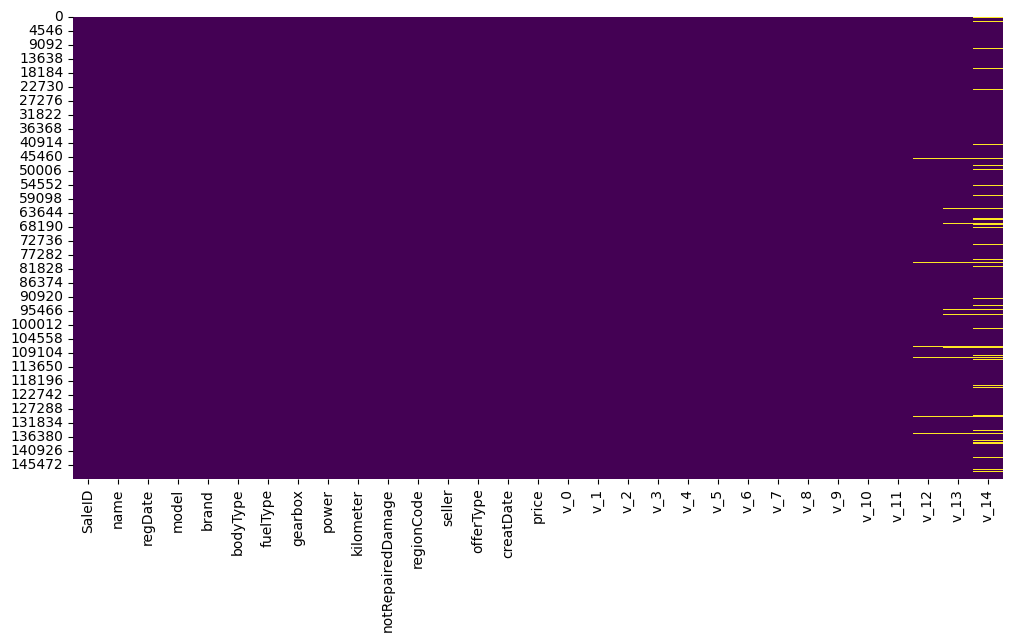

In [ ]:
# 可视化缺失分布
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")

### 1.1.2 test_data

In [ ]:
test_data.isnull().sum()

,0
SaleID,0
name,0
regDate,0
model,0
brand,0
bodyType,0
fuelType,0
gearbox,0
power,0
kilometer,0


<Axes: >

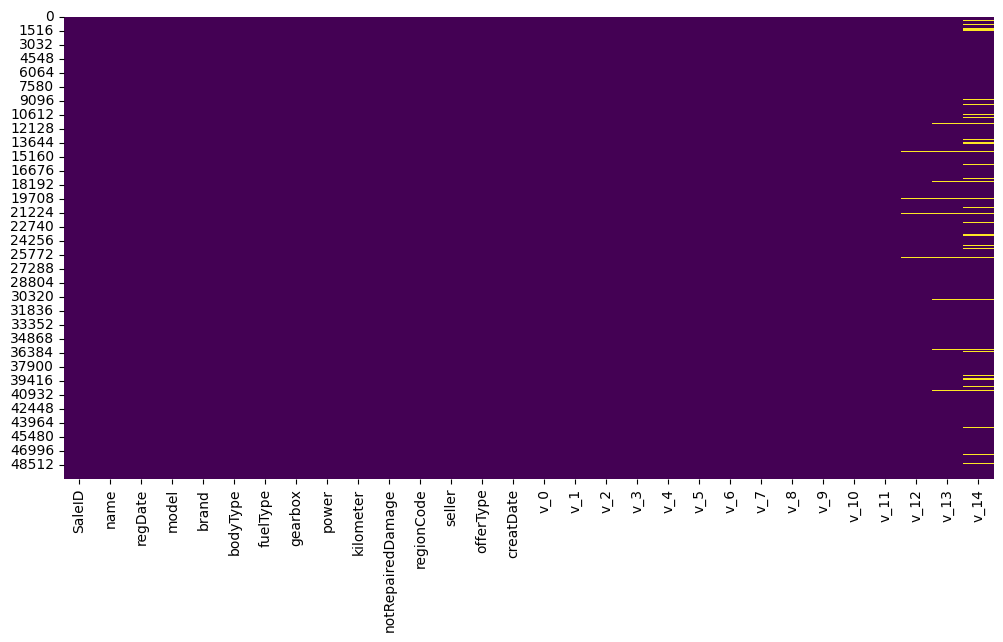

In [ ]:
# 可视化缺失分布
plt.figure(figsize=(12, 6))
sns.heatmap(test_data.isnull(), cbar=False, cmap="viridis")

## 1.2 数据类别和异常值检查
+ 除gearbox, power, kilometer和notRepairedDamage为object外, 其他都为数值类型

### 1.2.1 train dataset - 数据类别检查

In [ ]:
train_data['notRepairedDamage'].value_counts()

,count
notRepairedDamage,
0.0,105715
-,17558
1.0,12611
0,3586
70,56
...,...
1283,1
4490,1
4300,1


In [ ]:
mask = ~train_data['notRepairedDamage'].isin(["0.0", "1.0", '-'])
abnormal_count = mask.sum()
print(f"异常值数量: {abnormal_count}")

异常值数量: 14116


In [ ]:
for val in train_data['notRepairedDamage'].unique():
    print(val, type(val))

0.0 <class 'str'>
- <class 'str'>
1.0 <class 'str'>
0 <class 'str'>
4825 <class 'str'>
1326 <class 'str'>
6792 <class 'str'>
5765 <class 'str'>
1141 <class 'str'>
5084 <class 'str'>
1465 <class 'str'>
5313 <class 'str'>
665 <class 'str'>
1225 <class 'str'>
560 <class 'str'>
4293 <class 'str'>
556 <class 'str'>
6409 <class 'str'>
2578 <class 'str'>
2679 <class 'str'>
2754 <class 'str'>
6244 <class 'str'>
1543 <class 'str'>
2049 <class 'str'>
5997 <class 'str'>
78 <class 'str'>
125 <class 'str'>
1496 <class 'str'>
1411 <class 'str'>
200 <class 'str'>
874 <class 'str'>
2062 <class 'str'>
336 <class 'str'>
754 <class 'str'>
3103 <class 'str'>
3815 <class 'str'>
446 <class 'str'>
762 <class 'str'>
3124 <class 'str'>
4987 <class 'str'>
2468 <class 'str'>
1319 <class 'str'>
2007 <class 'str'>
3972 <class 'str'>
486 <class 'str'>
5435 <class 'str'>
3235 <class 'str'>
4975 <class 'str'>
5806 <class 'str'>
398 <class 'str'>
6111 <class 'str'>
2870 <class 'str'>
2557 <class 'str'>
107 <class 'str

In [ ]:
train_data['gearbox'].value_counts()

,count
gearbox,
0.0,104864
1.0,31105
0,3373
15.0,1517
-,1387
...,...
1988,1
2598,1
436,1


In [ ]:
for val in train_data['gearbox'].unique():
    print(val, type(val))

0.0 <class 'str'>
1.0 <class 'str'>
15.0 <class 'str'>
90 <class 'str'>
60 <class 'str'>
0 <class 'str'>
115 <class 'str'>
50 <class 'str'>
- <class 'str'>
142 <class 'str'>
8.0 <class 'str'>
265 <class 'str'>
101 <class 'str'>
170 <class 'str'>
190 <class 'str'>
349 <class 'str'>
61 <class 'str'>
12.5 <class 'str'>
150 <class 'str'>
45 <class 'str'>
65 <class 'str'>
75 <class 'str'>
54 <class 'str'>
187 <class 'str'>
136 <class 'str'>
125 <class 'str'>
143 <class 'str'>
58 <class 'str'>
70 <class 'str'>
29 <class 'str'>
74 <class 'str'>
95 <class 'str'>
55 <class 'str'>
167 <class 'str'>
116 <class 'str'>
120 <class 'str'>
140 <class 'str'>
163 <class 'str'>
33 <class 'str'>
2.0 <class 'str'>
56 <class 'str'>
110 <class 'str'>
131 <class 'str'>
250 <class 'str'>
100 <class 'str'>
211 <class 'str'>
71 <class 'str'>
10.0 <class 'str'>
102 <class 'str'>
88 <class 'str'>
5.0 <class 'str'>
165 <class 'str'>
64 <class 'str'>
179 <class 'str'>
73 <class 'str'>
400 <class 'str'>
87 <class 'st

In [ ]:
train_data['power'].value_counts()

,count
power,
75,8798
15.0,7793
0,7186
150,6091
60,5781
...,...
6677,1
5886,1
5240,1


In [ ]:
for val in train_data['power'].unique():
    print(val, type(val))
    # 数据类型不对且有异常值, [0,600]

60 <class 'str'>
0 <class 'str'>
163 <class 'str'>
193 <class 'str'>
68 <class 'str'>
109 <class 'str'>
150 <class 'str'>
101 <class 'str'>
179 <class 'str'>
88 <class 'str'>
75 <class 'str'>
58 <class 'str'>
- <class 'str'>
128 <class 'str'>
239 <class 'str'>
145 <class 'str'>
45 <class 'str'>
105 <class 'str'>
54 <class 'str'>
143 <class 'str'>
218 <class 'str'>
170 <class 'str'>
90 <class 'str'>
306 <class 'str'>
133 <class 'str'>
116 <class 'str'>
15.0 <class 'str'>
102 <class 'str'>
177 <class 'str'>
140 <class 'str'>
115 <class 'str'>
180 <class 'str'>
131 <class 'str'>
110 <class 'str'>
160 <class 'str'>
65 <class 'str'>
120 <class 'str'>
73 <class 'str'>
77 <class 'str'>
500 <class 'str'>
136 <class 'str'>
233 <class 'str'>
125 <class 'str'>
300 <class 'str'>
190 <class 'str'>
192 <class 'str'>
126 <class 'str'>
203 <class 'str'>
55 <class 'str'>
100 <class 'str'>
122 <class 'str'>
174 <class 'str'>
69 <class 'str'>
165 <class 'str'>
320 <class 'str'>
64 <class 'str'>
78 <class

In [ ]:
train_data['kilometer'].value_counts()

,count
kilometer,
15.0,86699
12.5,14534
10.0,5975
0.0,4980
9.0,4927
...,...
5809,1
6486,1
344,1


In [ ]:
for val in train_data['kilometer'].unique():
    print(val, type(val))
    # 数据类型不对且有异常值, [0,20]

12.5 <class 'str'>
15.0 <class 'str'>
5.0 <class 'str'>
10.0 <class 'str'>
2.0 <class 'str'>
6.0 <class 'str'>
3972 <class 'str'>
1278 <class 'str'>
3.0 <class 'str'>
0.0 <class 'str'>
7.0 <class 'str'>
8.0 <class 'str'>
9.0 <class 'str'>
26 <class 'str'>
4.0 <class 'str'>
2976 <class 'str'>
1.0 <class 'str'>
- <class 'str'>
0 <class 'str'>
0.5 <class 'str'>
2615 <class 'str'>
896 <class 'str'>
6597 <class 'str'>
3741 <class 'str'>
4566 <class 'str'>
6696 <class 'str'>
179 <class 'str'>
944 <class 'str'>
5649 <class 'str'>
368 <class 'str'>
5963 <class 'str'>
2294 <class 'str'>
1294 <class 'str'>
3519 <class 'str'>
491 <class 'str'>
2482 <class 'str'>
1123 <class 'str'>
2247 <class 'str'>
208 <class 'str'>
2607 <class 'str'>
4062 <class 'str'>
2593 <class 'str'>
1168 <class 'str'>
2705 <class 'str'>
290 <class 'str'>
3216 <class 'str'>
4494 <class 'str'>
4682 <class 'str'>
2603 <class 'str'>
6839 <class 'str'>
3780 <class 'str'>
2472 <class 'str'>
213 <class 'str'>
78 <class 'str'>
449

### 1.2.2 test data - 数据类别检查

In [ ]:
test_data['notRepairedDamage'].value_counts()

,count
notRepairedDamage,
0.0,35382
-,5847
1.0,4127
0,1120
1530,19
...,...
1241,1
1525,1
2619,1


In [ ]:
for val in test_data['notRepairedDamage'].unique():
    print(val, type(val))

0.0 <class 'str'>
1.0 <class 'str'>
- <class 'str'>
2085 <class 'str'>
0 <class 'str'>
5953 <class 'str'>
3169 <class 'str'>
964 <class 'str'>
2025 <class 'str'>
5623 <class 'str'>
3351 <class 'str'>
1233 <class 'str'>
4007 <class 'str'>
1552 <class 'str'>
2962 <class 'str'>
3517 <class 'str'>
309 <class 'str'>
4454 <class 'str'>
803 <class 'str'>
2859 <class 'str'>
4175 <class 'str'>
831 <class 'str'>
1222 <class 'str'>
4107 <class 'str'>
2251 <class 'str'>
4652 <class 'str'>
4573 <class 'str'>
718 <class 'str'>
238 <class 'str'>
2718 <class 'str'>
1535 <class 'str'>
5191 <class 'str'>
2957 <class 'str'>
3677 <class 'str'>
3047 <class 'str'>
1597 <class 'str'>
84 <class 'str'>
2986 <class 'str'>
1973 <class 'str'>
3953 <class 'str'>
725 <class 'str'>
2219 <class 'str'>
2396 <class 'str'>
2829 <class 'str'>
502 <class 'str'>
1185 <class 'str'>
167 <class 'str'>
5748 <class 'str'>
3428 <class 'str'>
874 <class 'str'>
99 <class 'str'>
3143 <class 'str'>
998 <class 'str'>
5548 <class 'str

In [ ]:
test_data['gearbox'].value_counts()

,count
gearbox,
0.0,35033
1.0,10345
0,1108
15.0,485
-,434
...,...
521,1
280,1
480,1


In [ ]:
test_data['kilometer'].value_counts()

,count
kilometer,
15.0,28869
12.5,4935
10.0,1944
9.0,1689
0.0,1641
...,...
2293,1
3210,1
2991,1


In [ ]:
test_data['power'].value_counts()

,count
power,
75,2955
15.0,2549
0,2382
150,2053
60,1967
...,...
6600,1
5396,1
10522,1


## 1.3 数据类别和异常值处理

### 1.3.1 处理notRepairedDamage和gearbox字段

In [ ]:
def clean_categories(col):
    col = col.astype(str)
    col = col.apply(lambda x: x if x in ['0.0', '1.0'] else np.nan)
    return pd.to_numeric(col, errors='coerce').fillna(-1).astype(int)

In [ ]:
# 应用于训练集和测试集
train_data['notRepairedDamage'] = clean_categories(train_data['notRepairedDamage'])
train_data['gearbox'] = clean_categories(train_data['gearbox'])
test_data['notRepairedDamage'] = clean_categories(test_data['notRepairedDamage'])
test_data['gearbox'] = clean_categories(test_data['gearbox'])

In [ ]:
train_data['gearbox'].value_counts()

,count
gearbox,
0,104864
1,31105
-1,14031


### 1.3.2 处理power字段

In [ ]:
def clean_power(col, max_valid=600):
    col = pd.to_numeric(col, errors='coerce')
    col = col.apply(lambda x: x if 0 <= x <= max_valid else np.nan)
    return col.fillna(-1).astype(int)

In [ ]:
train_data['power'] = clean_power(train_data['power'])
test_data['power'] = clean_power(test_data['power'])

In [ ]:
for val in train_data['power'].unique():
    print(val, type(val))

60 <class 'numpy.int64'>
0 <class 'numpy.int64'>
163 <class 'numpy.int64'>
193 <class 'numpy.int64'>
68 <class 'numpy.int64'>
109 <class 'numpy.int64'>
150 <class 'numpy.int64'>
101 <class 'numpy.int64'>
179 <class 'numpy.int64'>
88 <class 'numpy.int64'>
75 <class 'numpy.int64'>
58 <class 'numpy.int64'>
-1 <class 'numpy.int64'>
128 <class 'numpy.int64'>
239 <class 'numpy.int64'>
145 <class 'numpy.int64'>
45 <class 'numpy.int64'>
105 <class 'numpy.int64'>
54 <class 'numpy.int64'>
143 <class 'numpy.int64'>
218 <class 'numpy.int64'>
170 <class 'numpy.int64'>
90 <class 'numpy.int64'>
306 <class 'numpy.int64'>
133 <class 'numpy.int64'>
116 <class 'numpy.int64'>
15 <class 'numpy.int64'>
102 <class 'numpy.int64'>
177 <class 'numpy.int64'>
140 <class 'numpy.int64'>
115 <class 'numpy.int64'>
180 <class 'numpy.int64'>
131 <class 'numpy.int64'>
110 <class 'numpy.int64'>
160 <class 'numpy.int64'>
65 <class 'numpy.int64'>
120 <class 'numpy.int64'>
73 <class 'numpy.int64'>
77 <class 'numpy.int64'>
5

### 1.3.3 处理kilometer字段

In [ ]:
def clean_kilometer(col, max_valid=20):
    col = pd.to_numeric(col, errors='coerce')
    col = col.apply(lambda x: x if 0 <= x <= max_valid else np.nan)
    return col.fillna(-1).astype(int)

In [ ]:
train_data['kilometer'] = clean_kilometer(train_data['kilometer'])
test_data['kilometer'] = clean_kilometer(test_data['kilometer'])

In [ ]:
for val in train_data['kilometer'].unique():
    print(val, type(val))

12 <class 'numpy.int64'>
15 <class 'numpy.int64'>
5 <class 'numpy.int64'>
10 <class 'numpy.int64'>
2 <class 'numpy.int64'>
6 <class 'numpy.int64'>
-1 <class 'numpy.int64'>
3 <class 'numpy.int64'>
0 <class 'numpy.int64'>
7 <class 'numpy.int64'>
8 <class 'numpy.int64'>
9 <class 'numpy.int64'>
4 <class 'numpy.int64'>
1 <class 'numpy.int64'>
18 <class 'numpy.int64'>
17 <class 'numpy.int64'>


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              150000 non-null  float64
 4   brand              150000 non-null  float64
 5   bodyType           150000 non-null  float64
 6   fuelType           150000 non-null  float64
 7   gearbox            150000 non-null  int64  
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  int64  
 10  notRepairedDamage  150000 non-null  int64  
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  float64
 14  creatDate          150000 non-null  float64
 15  price              150000 non-null  float64
 16  v_

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           50000 non-null  float64
 6   fuelType           50000 non-null  float64
 7   gearbox            50000 non-null  int64  
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  int64  
 10  notRepairedDamage  50000 non-null  int64  
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  float64
 13  offerType          50000 non-null  float64
 14  creatDate          50000 non-null  float64
 15  v_0                50000 non-null  float64
 16  v_1                500

### 1.3.4 处理bodyType字段

In [ ]:
def clean_bodyType(col, max_valid=7):
    col = pd.to_numeric(col, errors='coerce')
    col = col.apply(lambda x: x if 0 <= x <= max_valid else np.nan)
    return col.fillna(-1).astype(int)

In [ ]:
train_data['bodyType'] = clean_bodyType(train_data['bodyType'])
test_data['bodyType'] = clean_bodyType(test_data['bodyType'])

In [ ]:
for val in train_data['bodyType'].unique():
    print(val, type(val))

1 <class 'numpy.int64'>
2 <class 'numpy.int64'>
0 <class 'numpy.int64'>
5 <class 'numpy.int64'>
3 <class 'numpy.int64'>
6 <class 'numpy.int64'>
7 <class 'numpy.int64'>
4 <class 'numpy.int64'>
-1 <class 'numpy.int64'>


### 1.3.5 处理fuelType字段

In [ ]:
def clean_fuelType(col, max_valid=6):
    col = pd.to_numeric(col, errors='coerce')
    col = col.apply(lambda x: x if 0 <= x <= max_valid else np.nan)
    return col.fillna(-1).astype(int)

In [ ]:
train_data['fuelType'] = clean_fuelType(train_data['fuelType'])
test_data['fuelType'] = clean_fuelType(test_data['fuelType'])

In [ ]:
for val in train_data['fuelType'].unique():
    print(val, type(val))

0 <class 'numpy.int64'>
1 <class 'numpy.int64'>
-1 <class 'numpy.int64'>
2 <class 'numpy.int64'>
3 <class 'numpy.int64'>
4 <class 'numpy.int64'>
5 <class 'numpy.int64'>
6 <class 'numpy.int64'>


### 1.3.6 处理seller字段

In [ ]:
def clean_seller(col, max_valid=1):
    col = pd.to_numeric(col, errors='coerce')
    col = col.apply(lambda x: x if 0 <= x <= max_valid else np.nan)
    return col.fillna(-1).astype(int)

In [ ]:
train_data['seller'] = clean_seller(train_data['seller'])
test_data['seller'] = clean_seller(test_data['seller'])

In [ ]:
for val in train_data['seller'].unique():
    print(val, type(val))

0 <class 'numpy.int64'>
-1 <class 'numpy.int64'>
1 <class 'numpy.int64'>


### 1.3.7 处理offerType字段

In [ ]:
def clean_offerType(col, max_valid=1):
    col = pd.to_numeric(col, errors='coerce')
    col = col.apply(lambda x: x if 0 <= x <= max_valid else np.nan)
    return col.fillna(-1).astype(int)

In [ ]:
train_data['offerType'] = clean_offerType(train_data['offerType'])
test_data['offerType'] = clean_offerType(test_data['offerType'])

In [ ]:
for val in train_data['offerType'].unique():
    print(val, type(val))

0 <class 'numpy.int64'>
-1 <class 'numpy.int64'>


## 1.4 类别变量分布检查

In [ ]:
train_data['notRepairedDamage'].value_counts()

,count
notRepairedDamage,
0,105715
-1,31674
1,12611


In [ ]:
train_data['bodyType'].value_counts()

,count
bodyType,
0,45004
1,35996
2,30348
3,13498
4,9609
5,7612
6,6481
7,1289
-1,163


In [ ]:
train_data['fuelType'].value_counts()

,count
fuelType,
0,97414
1,47622
-1,2238
2,2217
3,270
4,129
5,57
6,53


In [ ]:
train_data['gearbox'].value_counts()

,count
gearbox,
0,104864
1,31105
-1,14031


In [ ]:
train_data['seller'].value_counts()

,count
seller,
0,146416
-1,3583
1,1


In [ ]:
train_data['offerType'].value_counts()

,count
offerType,
0,135884
-1,14116


In [ ]:
# seller和offerType的类别倾斜严重, 数据几乎全为个体销售，以及主动提供报价类型, 全部删除
del train_data['seller']
del train_data['offerType']
del test_data['seller']
del test_data['offerType']

In [ ]:
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6.0,1,0,0,60,12,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1.0,2,0,0,0,15,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15.0,1,0,0,163,12,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10.0,0,0,1,193,15,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5.0,1,0,0,68,5,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


# 2. EDA

## 2.1 预测值的分布

### 2.1.1 查看预测值的skewness(偏度) and kurtosis(峰度)

/tmp/ipython-input-84-3538112527.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['price']);


Skewness: 3.259240
Kurtosis: 17.966895


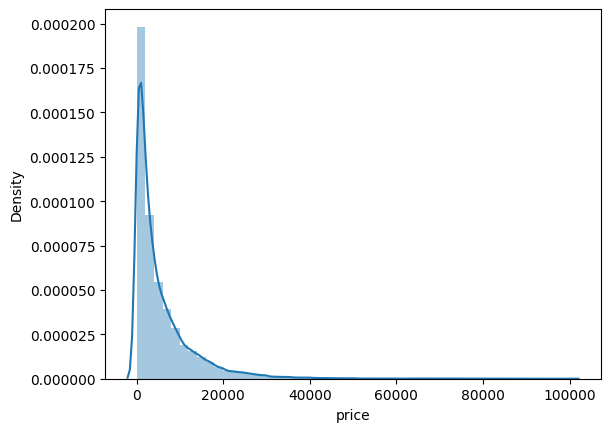

In [ ]:
sns.distplot(train_data['price']);
print("Skewness: %f" % train_data['price'].skew())
print("Kurtosis: %f" % train_data['price'].kurt())

Conlusion:   
+ 偏度>3,说明数据大部分集中在左侧（即价格偏低）;  
+ 峰度高说明数据集中性强（大多数车价集中在低价区）

### 2.1.2 查看price的直方图分布

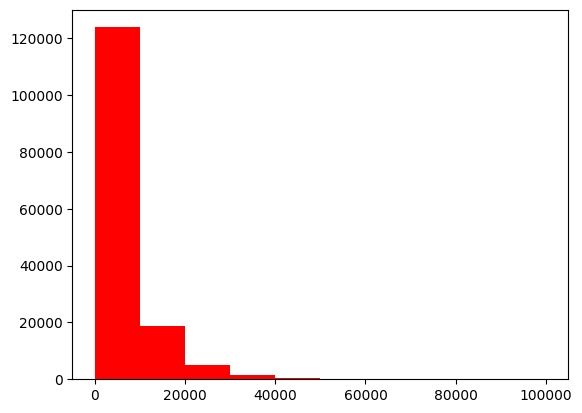

In [ ]:
plt.hist(train_data['price'],histtype = 'bar', color ='red')
plt.show()

### 2.1.3 对price进行log变换

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


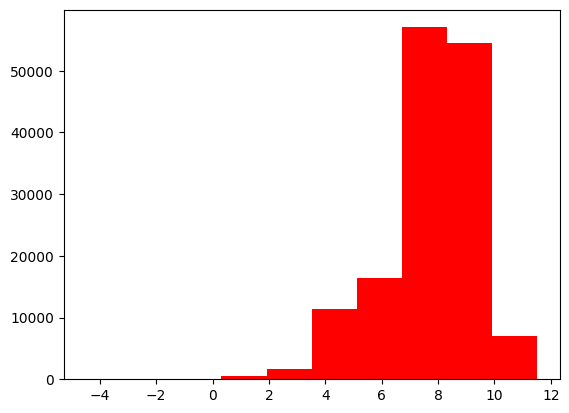

In [ ]:
plt.hist(np.log(train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

+ 可以看到log变换之后的分布更均匀

In [ ]:
# 对price做log变换
train_data['log_price'] = np.log1p(train_data['price'])  # 避免 log(0) 报错

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


+ 将log_price作为回归目标预测, 需要再使用np.expm1(y_pred)还原预测值为原始价格。

In [ ]:
# 保存训练集
train_data.to_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/cleaned_train_data.csv', index=False, encoding='utf-8')

# 保存测试集
test_data.to_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/cleaned_test_data.csv', index=False, encoding='utf-8')

## 2.2 数值特征的相关性分析

In [ ]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14', "price", "log_price"]

In [ ]:
price_numeric = train_data[numeric_features]
correlation = price_numeric.corr()
print(correlation['log_price'].sort_values(ascending = False),'\n')

log_price    1.000000
v_0          0.811132
price        0.682859
v_12         0.651727
power        0.638410
v_5          0.491399
kilometer    0.310073
v_2          0.089060
v_14         0.056244
v_13         0.024355
v_1         -0.019695
v_4         -0.161670
v_6         -0.247532
v_7         -0.265672
v_11        -0.270104
v_8         -0.283529
v_10        -0.305617
v_9         -0.433657
v_3         -0.612190
Name: log_price, dtype: float64 



<Axes: title={'center': 'Correlation of Numeric Features with log_Price'}>

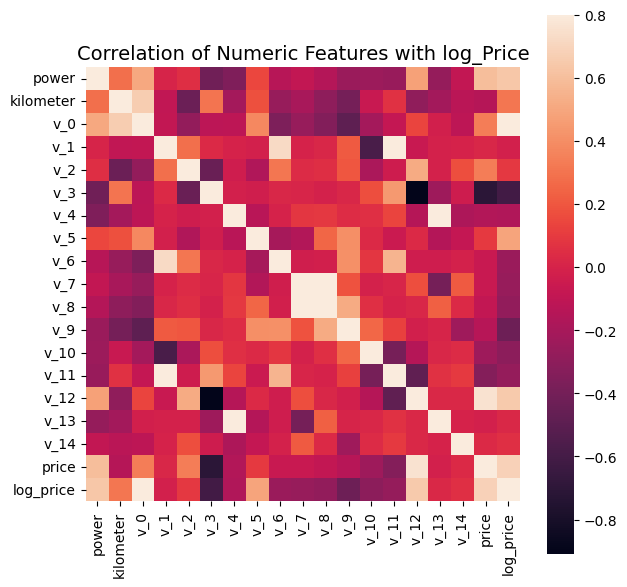

In [ ]:
# 热力图可视化相关性
f , ax = plt.subplots(figsize = (7, 7))

plt.title('Correlation of Numeric Features with log_Price',y=1,size=14)

sns.heatmap(correlation,square = True,  vmax=0.8)

+ 可以用与log_price的|相关性|作为筛选

# 3. 特征工程

In [ ]:
# 数据读取
train_data = pd.read_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/cleaned_train_data.csv')
test_data = pd.read_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/cleaned_test_data.csv')

In [ ]:
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,log_price
0,0,736,20040402,30.0,6.0,1,0,0,60,12,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,7.523481
1,1,2262,20030301,40.0,1.0,2,0,0,0,15,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,8.188967
2,2,14874,20040403,115.0,15.0,1,0,0,163,12,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,8.736007
3,3,71865,19960908,109.0,10.0,0,0,1,193,15,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,7.783641
4,4,111080,20120103,110.0,5.0,1,0,0,68,5,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,8.556606


In [ ]:
train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14',
       'log_price'],
      dtype='object')

In [ ]:
test_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5,1,1,313,15,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0,0,0,75,12,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0,0,0,109,7,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0,0,1,160,7,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2,0,0,75,15,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290


In [ ]:
test_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7',
       'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [ ]:
# 训练集和测试集放在一起，方便构造特征
# 构造新特征列train来区分训练集和测试集
train_data['train']=1
test_data['train']=0
data = pd.concat([train_data, test_data], ignore_index=True) # 会根据所有列名自动对齐

## 3.1 构造汽车使用时间used_time

In [ ]:
# 使用时间：data['creatDate'] - data['regDate']构造used_time，一般来说价格与使用时间成反比
# 但数据里有时间出错的格式，所以需要 errors='coerce'，能强制将报错值设置为null
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') -
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [ ]:
# 删除缺失数据占总样本量过大,不建议删除, 选择进行缺失值填充
data['used_time'].isnull().sum()

np.int64(26957)

In [ ]:
# 用-1填充缺失值used_time中的null - 用于树模型的训练
data['used_time'] = data['used_time'].fillna(-1)

In [ ]:
# 用均值填充缺失值used_time中的null - 用于线性模型和神经网络的训练
data['used_time_meanfill'] = data['used_time'].fillna(data['used_time'].mean())

In [ ]:
data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14',
       'log_price', 'train', 'used_time', 'used_time_meanfill'],
      dtype='object')

In [ ]:
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_9,v_10,v_11,v_12,v_13,v_14,log_price,train,used_time,used_time_meanfill
0,0,736,20040402,30.0,6.0,1,0,0,60,12,...,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,7.523481,1,4385.0,4385.0
1,1,2262,20030301,40.0,1.0,2,0,0,0,15,...,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,8.188967,1,4757.0,4757.0
2,2,14874,20040403,115.0,15.0,1,0,0,163,12,...,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,8.736007,1,4382.0,4382.0
3,3,71865,19960908,109.0,10.0,0,0,1,193,15,...,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,7.783641,1,7125.0,7125.0
4,4,111080,20120103,110.0,5.0,1,0,0,68,5,...,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,8.556606,1,1531.0,1531.0


## 3.2 构造与汽车品牌相关的特征
+ 一定程度上能反映品牌溢价、市场主流程度等间接语义
+ 只在训练集上构造
+ 相当于让模型学习一些关于品牌的特点，比如宝马是一个比较高端的品牌，大众是一个比较中等的品牌等

In [ ]:
# 要以 train 的数据计算统计量
train_gb = train_data.groupby("brand")
all_info = {}
for kind, kind_data in train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
data = data.merge(brand_fe, how='left', on='brand')

In [ ]:
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,train,used_time,used_time_meanfill,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average
0,0,736,20040402,30.0,6.0,1,0,0,60,12,...,1,4385.0,4385.0,10076.0,59900.0,1650.0,0.216981,3.468970e+07,4656.121118,3442.46
1,1,2262,20030301,40.0,1.0,2,0,0,0,15,...,1,4757.0,4757.0,13702.0,99900.0,6100.0,0.011300,1.234055e+08,9450.843699,9005.73
2,2,14874,20040403,115.0,15.0,1,0,0,163,12,...,1,4382.0,4382.0,1451.0,45000.0,8500.0,3.381581,1.387650e+07,5634.345867,9556.82
3,3,71865,19960908,109.0,10.0,0,0,1,193,15,...,1,7125.0,7125.0,14147.0,98000.0,5000.0,0.476178,1.158543e+08,9046.159956,8188.74
4,4,111080,20120103,110.0,5.0,1,0,0,68,5,...,1,1531.0,1531.0,4609.0,31500.0,2200.0,1.151239,1.462294e+07,3381.498842,3172.01


In [ ]:
data = data.drop(['creatDate','regDate','regionCode'],axis = 1) # 删除不需要的数据

In [ ]:
data.columns

Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'price', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'log_price', 'train', 'used_time', 'used_time_meanfill',
       'brand_amount', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_sum', 'brand_price_std',
       'brand_price_average'],
      dtype='object')

## 3.3 对power做分桶

In [ ]:
# 为什么要做数据分桶？
# 1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
# 3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能够提升模型的表达能力，加大拟合；
# 4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
# 5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化
# 当然还有很多原因，LightGBM 在改进 XGBoost 时就增加了数据分桶，增强了模型的泛化性

bins = [0, 50, 80, 120, 160, 200, 250, np.inf]
labels = list(range(len(bins) - 1))
data['power_bin'] = pd.cut(data['power'], bins=bins, labels=labels, right=True, include_lowest=True)
data[['power_bin', 'power']].head()

,power_bin,power
0,1,60
1,0,0
2,4,163
3,4,193
4,1,68


In [ ]:
data['power'].unique()

array([ 60,   0, 163, 193,  68, 109, 150, 101, 179,  88,  75,  58,  -1,
       128, 239, 145,  45, 105,  54, 143, 218, 170,  90, 306, 133, 116,
        15, 102, 177, 140, 115, 180, 131, 110, 160,  65, 120,  73,  77,
       500, 136, 233, 125, 300, 190, 192, 126, 203,  55, 100, 122, 174,
        69, 165, 320,  64,  78, 224,  80,  71, 340, 144, 387, 230,  86,
       111,  12, 107,  61, 103,  63,  95, 204,  40, 284,   3,  97,   8,
         1, 272,  50,  87, 260, 135,   9, 211, 106, 200, 333, 220,  10,
       299, 114,  67, 245,  82, 196, 258,   4,  70, 155, 313, 113, 184,
       345, 108,  98, 129,  84,  59, 250, 321, 235, 256, 231, 252, 197,
       280,  41, 185, 232, 396,  43, 205,  99, 104,  85, 431, 225, 156,
        46, 226, 175, 424,  92, 121, 130, 172,  91, 315, 141, 334, 119,
       132, 420, 147, 305, 118,  44, 582, 117, 240, 112, 241, 385, 564,
       124,   7, 194,   2, 450,  83, 182,   6, 286, 408,  39, 265,  56,
       207, 581,  76, 367, 400, 137, 166, 355, 295, 151, 480,  7

In [ ]:
# 用均值填充power中的负值
data['power'] = data['power'].replace(-1, np.nan)  # 把 -1 还原为缺失值
data['power'] = data['power'].fillna(data['power'].mean())  # 用均值填充

In [ ]:
data['power'].unique()

array([ 60.        ,   0.        , 163.        , 193.        ,
        68.        , 109.        , 150.        , 101.        ,
       179.        ,  88.        ,  75.        ,  58.        ,
       113.18754227, 128.        , 239.        , 145.        ,
        45.        , 105.        ,  54.        , 143.        ,
       218.        , 170.        ,  90.        , 306.        ,
       133.        , 116.        ,  15.        , 102.        ,
       177.        , 140.        , 115.        , 180.        ,
       131.        , 110.        , 160.        ,  65.        ,
       120.        ,  73.        ,  77.        , 500.        ,
       136.        , 233.        , 125.        , 300.        ,
       190.        , 192.        , 126.        , 203.        ,
        55.        , 100.        , 122.        , 174.        ,
        69.        , 165.        , 320.        ,  64.        ,
        78.        , 224.        ,  80.        ,  71.        ,
       340.        , 144.        , 387.        , 230.  

In [ ]:
# 导出树模型所需的数据集
# 用于树模型的数值特征不需要进行归一化, 原因如下：
# 1. 树模型按数值分裂(它关注的是“大小关系”，不关心数值的绝对量纲)
# 2. 特征分布对模型影响不大(不依赖梯度传播或距离计算)
data.to_csv('/content/drive/My Drive/推荐系统项目-二手车价格预测/data_for_tree.csv', index=False)

## 3.4 对数值特征做归一化


### 3.4.1 对power取log再做归一化

<Axes: ylabel='Frequency'>

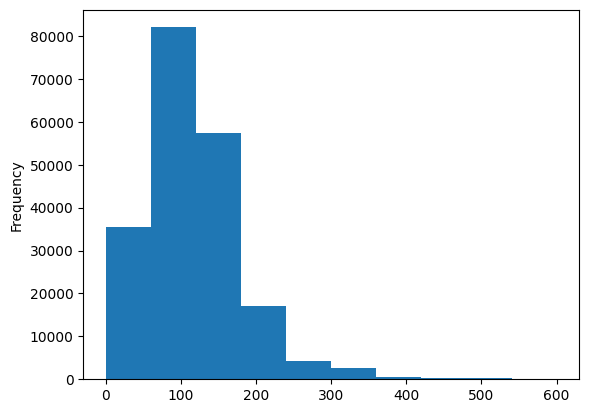

In [ ]:
data['power'].plot.hist()

In [ ]:
data['power'] = np.log1p(data['power'])  # 等价于 np.log(data['power'] + 1)
data['power'] = (data['power'] - data['power'].min()) / (data['power'].max() - data['power'].min())

<Axes: ylabel='Frequency'>

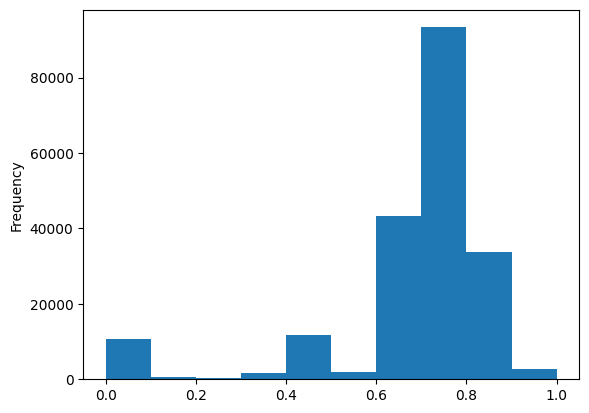

In [ ]:
data['power'].plot.hist()

### 3.4.2 对所有数值特征做归一化

In [ ]:
def min_max_normalize(df, cols):
    """
    对指定列进行min-max归一化处理（归一到[0,1]之间）
    :param df: pandas.DataFrame, 原始数据
    :param cols: list[str], 要归一化的列名列表
    :return: 归一化后的DataFrame（原地修改）
    """
    for col in cols:
        min_val = df[col].min()
        max_val = df[col].max()
        df[col] = (df[col] - min_val) / (max_val - min_val)
    return df

In [ ]:
num_cols = ['kilometer', "used_time_meanfill",'brand_amount','brand_price_average','brand_price_max','brand_price_median','brand_price_min', 'brand_price_std', 'brand_price_sum']
data = min_max_normalize(data, num_cols)

In [ ]:
data.head()

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,used_time,used_time_meanfill,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,736,30.0,6.0,1,0,0,0.642465,0.684211,0,...,4385.0,0.475550,0.323856,0.587030,0.031860,0.005788,0.210398,0.179469,0.073866,1
1,1,2262,40.0,1.0,2,0,0,0.000000,0.842105,-1,...,4757.0,0.515884,0.440481,0.998980,0.189387,0.000000,0.748766,0.391788,0.238992,0
2,2,14874,115.0,15.0,1,0,0,0.797029,0.684211,0,...,4382.0,0.475225,0.046444,0.433578,0.274346,0.094849,0.084094,0.222787,0.255350,4
3,3,71865,109.0,10.0,0,0,1,0.823284,0.842105,0,...,7125.0,0.772634,0.454794,0.979413,0.150448,0.013083,0.702942,0.373868,0.214743,4
4,4,111080,110.0,5.0,1,0,0,0.661724,0.315789,0,...,1531.0,0.166106,0.148017,0.294545,0.051329,0.032081,0.088624,0.123027,0.065839,1


In [ ]:
data.columns

Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'price', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'log_price', 'train', 'used_time', 'used_time_meanfill',
       'brand_amount', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_sum', 'brand_price_std',
       'brand_price_average', 'power_bin'],
      dtype='object')

In [ ]:
data.shape

(200000, 38)

## 3.5 对类别特征做one-hot编码

In [ ]:
data['brand'].nunique()

40

In [ ]:
data['model'].nunique()

248

In [ ]:
data_for_lr = pd.get_dummies(data, columns=["model", "brand", "bodyType", "fuelType", 'gearbox', 'notRepairedDamage', 'power_bin'])

In [ ]:
print(data_for_lr.shape)
data_for_lr.columns

(200000, 349)


Index(['SaleID', 'name', 'power', 'kilometer', 'price', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4',
       ...
       'notRepairedDamage_-1', 'notRepairedDamage_0', 'notRepairedDamage_1',
       'power_bin_0', 'power_bin_1', 'power_bin_2', 'power_bin_3',
       'power_bin_4', 'power_bin_5', 'power_bin_6'],
      dtype='object', length=349)

In [ ]:
data_for_lr.head()

,SaleID,name,power,kilometer,price,v_0,v_1,v_2,v_3,v_4,...,notRepairedDamage_-1,notRepairedDamage_0,notRepairedDamage_1,power_bin_0,power_bin_1,power_bin_2,power_bin_3,power_bin_4,power_bin_5,power_bin_6
0,0,736,0.642465,0.684211,1850.0,43.357796,3.966344,0.050257,2.159744,1.143786,...,False,True,False,False,True,False,False,False,False,False
1,1,2262,0.000000,0.842105,3600.0,45.305273,5.236112,0.137925,1.380657,-1.422165,...,True,False,False,True,False,False,False,False,False,False
2,2,14874,0.797029,0.684211,6222.0,45.978359,4.823792,1.319524,-0.998467,-0.996911,...,False,True,False,False,False,False,False,True,False,False
3,3,71865,0.823284,0.842105,2400.0,45.687478,4.492574,-0.050616,0.883600,-2.228079,...,False,True,False,False,False,False,False,True,False,False
4,4,111080,0.661724,0.315789,5200.0,44.383511,2.031433,0.572169,-1.571239,2.246088,...,False,True,False,False,True,False,False,False,False,False


In [ ]:
# LR使用的数据集
data_for_lr.to_csv('/content/drive/My Drive/推荐系统项目-二手车价格预测/data_for_lr.csv', index=False)

In [ ]:
data.head()

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,used_time,used_time_meanfill,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,736,30.0,6.0,1,0,0,0.642465,0.684211,0,...,4385.0,0.475550,0.323856,0.587030,0.031860,0.005788,0.210398,0.179469,0.073866,1
1,1,2262,40.0,1.0,2,0,0,0.000000,0.842105,-1,...,4757.0,0.515884,0.440481,0.998980,0.189387,0.000000,0.748766,0.391788,0.238992,0
2,2,14874,115.0,15.0,1,0,0,0.797029,0.684211,0,...,4382.0,0.475225,0.046444,0.433578,0.274346,0.094849,0.084094,0.222787,0.255350,4
3,3,71865,109.0,10.0,0,0,1,0.823284,0.842105,0,...,7125.0,0.772634,0.454794,0.979413,0.150448,0.013083,0.702942,0.373868,0.214743,4
4,4,111080,110.0,5.0,1,0,0,0.661724,0.315789,0,...,1531.0,0.166106,0.148017,0.294545,0.051329,0.032081,0.088624,0.123027,0.065839,1


In [ ]:
# DNN使用的数据集
# 不需要对类别特征做one-hot编码,而是在DNN中做Embedding
data.to_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/data_for_DNN.csv', index=False)

# 4. 模型建立

## 4.1 线性回归

In [337]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [338]:
data_for_lr = pd.read_csv(r"D:\推荐系统资料\白泽老师\data_for_lr.csv")

In [339]:
data_for_lr.head()

,SaleID,name,power,kilometer,price,v_0,v_1,v_2,v_3,v_4,...,notRepairedDamage_-1,notRepairedDamage_0,notRepairedDamage_1,power_bin_0,power_bin_1,power_bin_2,power_bin_3,power_bin_4,power_bin_5,power_bin_6
0,0,736,0.642465,0.684211,1850.0,43.357796,3.966344,0.050257,2.159744,1.143786,...,False,True,False,False,True,False,False,False,False,False
1,1,2262,0.000000,0.842105,3600.0,45.305273,5.236112,0.137925,1.380657,-1.422165,...,True,False,False,True,False,False,False,False,False,False
2,2,14874,0.797029,0.684211,6222.0,45.978359,4.823792,1.319524,-0.998467,-0.996911,...,False,True,False,False,False,False,False,True,False,False
3,3,71865,0.823284,0.842105,2400.0,45.687478,4.492574,-0.050616,0.883600,-2.228079,...,False,True,False,False,False,False,False,True,False,False
4,4,111080,0.661724,0.315789,5200.0,44.383511,2.031433,0.572169,-1.571239,2.246088,...,False,True,False,False,True,False,False,False,False,False


In [340]:
data_for_lr.shape

(200000, 349)

In [341]:
data_for_lr.isnull().sum().sort_values(ascending=False)

log_price      51563
price          50000
v_14           18760
v_13            4703
v_12            1921
               ...  
model_87.0         0
model_86.0         0
model_85.0         0
model_84.0         0
power_bin_6        0
Length: 349, dtype: int64

In [342]:
train_data = data_for_lr[data_for_lr['train'] == 1].drop(columns=['train']).reset_index(drop=True)
test_data = data_for_lr[data_for_lr['train'] == 0].drop(columns=['train']).reset_index(drop=True)

In [343]:
train_data.isnull().sum().sort_values(ascending=False)

v_14           14116
v_13            3583
log_price       1563
v_12            1469
SaleID             0
               ...  
model_87.0         0
model_86.0         0
model_85.0         0
model_84.0         0
power_bin_6        0
Length: 348, dtype: int64

In [344]:
train_data = train_data.dropna().reset_index(drop=True)

In [345]:
train_data.shape

(135884, 348)

In [346]:
test_data.columns

Index(['SaleID', 'name', 'power', 'kilometer', 'price', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4',
       ...
       'notRepairedDamage_-1', 'notRepairedDamage_0', 'notRepairedDamage_1',
       'power_bin_0', 'power_bin_1', 'power_bin_2', 'power_bin_3',
       'power_bin_4', 'power_bin_5', 'power_bin_6'],
      dtype='object', length=348)

In [349]:
'log_price' in train_data.columns

True

In [350]:
"used_time_meanfill" in train_data.columns

True

### 4.1.1 划分数据集

In [351]:
X = train_data.drop(columns=['price', 'log_price', 'used_time_meanfill', 'power'])
y = train_data['price']

In [352]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=327)

In [353]:
X_train.shape, X_valid.shape

((108707, 344), (27177, 344))

### 4.1.2 模型训练 - Linear regression - Baseline

In [355]:
model = LinearRegression()
model = model.fit(X_train, y_train)

In [356]:
mean_absolute_error(y_valid, model.predict(X_valid))

2158.4201111777506

### 4.1.3 模型训练 - Lasso(L1正则化)

In [360]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [361]:
# 使用 GridSearchCV 对 Lasso 回归调参
grid_search = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_absolute_error')

In [362]:
# 最佳模型
best_model = grid_search.best_estimator_

# 验证集预测与评估
y_pred = best_model.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)

print("Best alpha:", grid_search.best_params_['alpha'])
print("Validation MAE:", mae)

Best alpha: 0.0001
Validation MAE: 2206.9882828130044


### 4.1.4 模型训练 - Ridge(L2正则化)

In [363]:
param_grid_ridge = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [364]:
# 使用 GridSearchCV 对 Ridge 回归调参
grid_search = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_absolute_error')

In [365]:
# 最佳模型
best_model = grid_search.best_estimator_

# 验证集预测与评估
y_pred = best_model.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)

print("Best alpha:", grid_search.best_params_['alpha'])
print("Validation MAE:", mae)

Best alpha: 0.0001
Validation MAE: 2158.5890005617603


## 4.2 XGBRegressor

In [157]:
! pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 3.3 MB/s eta 0:00:46
   ---------------------------------------- 1.0/150.0 MB 2.5 MB/s eta 0:01:00
   ---------------------------------------- 1.3/150.0 MB 2.3 MB/s eta 0:01:05
   ---------------------------------------- 1.8/150.0 MB 2.2 MB/s eta 0:01:08
    --------------------------------------- 2.4/150.0 MB 2.1 MB/s eta 0:01:10
    --------------------------------------- 2.6/150.0 MB 2.2 MB/s eta 0:01:09
    --------------------------------------- 3.1/150.0 MB 2.0 MB/s eta 0:01:12
    --------------------------------------- 3.4/150.0 MB 2.0 MB/s eta 0:01:14
   - -------------------------------------- 3.9/150.0 MB 2.0 MB/s eta 0:01:13
   - -------------------------------------- 4.2/150.0 MB 1.9 MB/s eta 0:01:16
   - -------------------------------------- 4.5/150.0 MB 2.0 MB/s eta 0:01:14
   - -------------------------------------- 5.0/150.0 MB 2.0 MB/s eta 0

In [158]:
from xgboost.sklearn import XGBRegressor  

In [160]:
data_for_tree = pd.read_csv(r"D:\推荐系统资料\白泽老师\data_for_tree.csv")

In [161]:
data_for_tree.head()

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,used_time,used_time_meanfill,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,736,30.0,6.0,1,0,0,60.0,12,0,...,4385.0,4385.0,10076.0,59900.0,1650.0,0.216981,3.468970e+07,4656.121118,3442.46,1.0
1,1,2262,40.0,1.0,2,0,0,0.0,15,-1,...,4757.0,4757.0,13702.0,99900.0,6100.0,0.011300,1.234055e+08,9450.843699,9005.73,0.0
2,2,14874,115.0,15.0,1,0,0,163.0,12,0,...,4382.0,4382.0,1451.0,45000.0,8500.0,3.381581,1.387650e+07,5634.345867,9556.82,4.0
3,3,71865,109.0,10.0,0,0,1,193.0,15,0,...,7125.0,7125.0,14147.0,98000.0,5000.0,0.476178,1.158543e+08,9046.159956,8188.74,4.0
4,4,111080,110.0,5.0,1,0,0,68.0,5,0,...,1531.0,1531.0,4609.0,31500.0,2200.0,1.151239,1.462294e+07,3381.498842,3172.01,1.0


In [162]:
data_for_tree.isnull().sum().sort_values(ascending=False)

log_price              51563
price                  50000
v_14                   18760
v_13                    4703
power_bin               3335
v_12                    1921
v_11                       0
train                      0
used_time                  0
used_time_meanfill         0
v_9                        0
brand_amount               0
brand_price_max            0
brand_price_median         0
brand_price_min            0
brand_price_sum            0
brand_price_std            0
brand_price_average        0
v_10                       0
SaleID                     0
name                       0
v_7                        0
model                      0
brand                      0
bodyType                   0
fuelType                   0
gearbox                    0
power                      0
kilometer                  0
notRepairedDamage          0
v_0                        0
v_1                        0
v_2                        0
v_3                        0
v_4           

In [163]:
# 拆分训练集和测试集
train_data1 = data_for_tree[data_for_tree['train'] == 1].drop(columns=['train', "used_time", "SaleID"])
test_data1 = data_for_tree[data_for_tree['train'] == 0].drop(columns=['train'])

In [164]:
train_data1.isnull().sum().sort_values(ascending=False)

v_14                   14116
v_13                    3583
power_bin               2555
log_price               1563
v_12                    1469
used_time_meanfill         0
v_10                       0
v_11                       0
brand_amount               0
v_8                        0
brand_price_max            0
brand_price_median         0
brand_price_min            0
brand_price_sum            0
brand_price_std            0
brand_price_average        0
v_9                        0
name                       0
model                      0
notRepairedDamage          0
brand                      0
bodyType                   0
fuelType                   0
gearbox                    0
power                      0
kilometer                  0
price                      0
v_6                        0
v_0                        0
v_1                        0
v_2                        0
v_3                        0
v_4                        0
v_5                        0
v_7           

In [165]:
train_data1 = train_data1.dropna().reset_index(drop=True)

In [166]:
train_data1.shape

(135770, 35)

In [167]:
test_data1 = test_data1.drop(columns=['price', "log_price"])

### 4.2.1 划分数据集

In [168]:
X1 = train_data1.drop(columns=['price', "log_price"])
y1 = train_data1['price']

In [169]:
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, test_size=0.2, random_state=327)

In [170]:
X1_train.shape, X1_valid.shape

((108616, 33), (27154, 33))

In [171]:
y1_train.shape, y1_valid.shape

((108616,), (27154,))

### 4.2.2 模型训练 - XGBRegressor - Baseline

In [172]:
model_xgb = XGBRegressor(n_estimators = 100, objective='reg:squarederror')

In [173]:
model_xgb = model_xgb.fit(X1_train, y1_train)

In [174]:
mean_absolute_error(y1_valid, model_xgb.predict(X1_valid))

644.757535817996

### 4.2.3 GridSearch调参

In [ ]:
model_xgb1 = XGBRegressor(n_estimators = 100, objective='reg:squarederror', device='cuda:0' )

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3,5,10,15,20],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

In [ ]:
grid_search = GridSearchCV(model_xgb1, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X1_train, y1_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda:0',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=No...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 10, 15, 20],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error')

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}


In [175]:
# 验证集预测与评估
best_model_xgb1 = XGBRegressor(
    n_estimators=200,       
    learning_rate=0.1,      
    max_depth=10,           
    subsample=1.0,          
    objective='reg:squarederror',  
    random_state=27        
)
best_model_xgb1 = best_model_xgb1.fit(X1_train, y1_train)
y1_pred = best_model_xgb1.predict(X1_valid)
mae = mean_absolute_error(y1_valid, y1_pred)
print("Validation MAE of best_model_xgb1:", mae)

Validation MAE of best_model_xgb1: 558.9517199724282


## 4.3 FM
+ 用的data_for_lr

In [253]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import torch

### 4.3.1 数据准备

In [269]:
data_for_tree = pd.read_csv(r"D:\推荐系统资料\白泽老师\data_for_tree.csv")

In [270]:
data_for_tree.head()

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,used_time,used_time_meanfill,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,736,30.0,6.0,1,0,0,60.0,12,0,...,4385.0,4385.0,10076.0,59900.0,1650.0,0.216981,3.468970e+07,4656.121118,3442.46,1.0
1,1,2262,40.0,1.0,2,0,0,0.0,15,-1,...,4757.0,4757.0,13702.0,99900.0,6100.0,0.011300,1.234055e+08,9450.843699,9005.73,0.0
2,2,14874,115.0,15.0,1,0,0,163.0,12,0,...,4382.0,4382.0,1451.0,45000.0,8500.0,3.381581,1.387650e+07,5634.345867,9556.82,4.0
3,3,71865,109.0,10.0,0,0,1,193.0,15,0,...,7125.0,7125.0,14147.0,98000.0,5000.0,0.476178,1.158543e+08,9046.159956,8188.74,4.0
4,4,111080,110.0,5.0,1,0,0,68.0,5,0,...,1531.0,1531.0,4609.0,31500.0,2200.0,1.151239,1.462294e+07,3381.498842,3172.01,1.0


In [271]:
data_for_tree.columns

Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'price', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'log_price', 'train', 'used_time', 'used_time_meanfill',
       'brand_amount', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_sum', 'brand_price_std',
       'brand_price_average', 'power_bin'],
      dtype='object')

In [272]:
# target是'price'
dense_cols = ['name','power', 'kilometer', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'used_time_meanfill',
       'brand_amount', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_sum', 'brand_price_std',
       'brand_price_average']  
sparse_cols =["model", "brand", "bodyType", "fuelType",'gearbox','notRepairedDamage']  # 类别特征列名

In [273]:
df = data_for_tree.dropna(subset=dense_cols + sparse_cols + ['price']).reset_index(drop=True)

In [274]:
# 标准化 dense 特征
scaler = StandardScaler()
dense_feat = scaler.fit_transform(df[dense_cols])

In [275]:
# 编码 sparse 特征
for col in sparse_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

sparse_feat = pd.get_dummies(df[sparse_cols]).values  # one-hot 编码

In [276]:
# 拼接全部特征
X2 = np.hstack([dense_feat, sparse_feat]).astype(np.float32)
y2 = df['price'].values.reshape(-1, 1).astype(np.float32)

In [277]:
# 划分训练集
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [278]:
# 转 Tensor
X_train2 = torch.tensor(X_train2)
X_val2 = torch.tensor(X_val2)
y_train2 = torch.tensor(y_train2)
y_val2 = torch.tensor(y_val2)

In [279]:
X_train2.shape, X_val2.shape, y_train2.shape, y_val2.shape

(torch.Size([108707, 32]),
 torch.Size([27177, 32]),
 torch.Size([108707, 1]),
 torch.Size([27177, 1]))

### 4.3.2 模型训练

In [280]:
class FM(nn.Module):
    """FM part"""
    def __init__(self, latent_dim, fea_num):
        """
        latent_dim: 每个特征的隐向量维度(embedding维度)
        fea_num: 输入特征总数(dense + sparse 拼接之后的特征数)
        """
        super(FM, self).__init__()
        
        self.latent_dim = latent_dim
        # 定义三个矩阵， 一个是全局偏置，一个是一阶权重矩阵， 一个是二阶交叉矩阵，注意这里的参数由于是可学习参数，需要用nn.Parameter进行定义
        self.w0 = nn.Parameter(torch.zeros([1,]))  # 标量，全局偏置
        self.w1 = nn.Parameter(torch.rand([fea_num, 1]))  # 一阶权重向量 W, [fea_num, 1]
        self.w2 = nn.Parameter(torch.rand([fea_num, latent_dim])) # 二阶隐向量 V, [fea_num, latent_dim]，为每个特征学习的隐向量
        
    def forward(self, inputs):  # inputs shape - [batch_size, fea_num]
        # 一阶交叉 - 全局偏置+每个特征的线性加权
        first_order = self.w0 + torch.mm(inputs, self.w1)   # shape - [batch_size, 1]
        # 二阶交叉 - 这个用FM的最终化简公式,相比原始公式更容易实现
        second_order = 1/2 * torch.sum(
            torch.pow(torch.mm(inputs, self.w2), 2) - torch.mm(torch.pow(inputs,2), torch.pow(self.w2, 2)),
            dim = 1,
            keepdim = True
        )         # shape - [batch_size, 1]
        
        return first_order + second_order 

In [281]:
# 初始化
fea_num = X_train2.shape[1]
model = FM(latent_dim=8, fea_num=fea_num)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

# Early Stopping 参数
patience = 20  # 连续多少次没有提升就停止
best_mae = float('inf')
patience_counter = 0

epochs = 10000
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train2)
    loss = loss_fn(y_pred, y_train2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val2)
            val_loss = loss_fn(val_pred, y_val2).item()
            mae = mean_absolute_error(y_val2.numpy(), val_pred.numpy())

        print(f"Epoch {epoch+1}, Train Loss: {loss.item():.4f}, Val MSE: {val_loss:.4f}, Val MAE: {mae:.4f}")

        # Early Stopping 判断
        if mae < best_mae:
            best_mae = mae
            patience_counter = 0
            best_model_state = model.state_dict()  # 保存当前最优模型参数
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopped at epoch {epoch+1}, best Val MAE: {best_mae:.4f}")
                break



Epoch 10, Train Loss: 46607464.0000, Val MSE: 44787608.0000, Val MAE: 4470.2676
Epoch 20, Train Loss: 31145216.0000, Val MSE: 30038532.0000, Val MAE: 3584.0796
Epoch 30, Train Loss: 17391900.0000, Val MSE: 16343912.0000, Val MAE: 2821.6106
Epoch 40, Train Loss: 12911821.0000, Val MSE: 12905206.0000, Val MAE: 2550.0310
Epoch 50, Train Loss: 12184037.0000, Val MSE: 11913060.0000, Val MAE: 2466.3369
Epoch 60, Train Loss: 11036961.0000, Val MSE: 10861978.0000, Val MAE: 2311.3525
Epoch 70, Train Loss: 10490945.0000, Val MSE: 10373454.0000, Val MAE: 2227.8374
Epoch 80, Train Loss: 9907650.0000, Val MSE: 9769973.0000, Val MAE: 2128.4319
Epoch 90, Train Loss: 9386865.0000, Val MSE: 9241510.0000, Val MAE: 2032.3973
Epoch 100, Train Loss: 8947921.0000, Val MSE: 8830319.0000, Val MAE: 1947.7252
Epoch 110, Train Loss: 8618262.0000, Val MSE: 8527561.0000, Val MAE: 1895.2852
Epoch 120, Train Loss: 8358071.0000, Val MSE: 8289335.0000, Val MAE: 1857.7263
Epoch 130, Train Loss: 8123600.5000, Val MSE: 8

## 4.4 Wide&Deep

In [282]:
import torch.nn.functional as F

### 4.4.1 数据预处理

In [283]:
# target是'price'
dense_cols = ['name','power', 'kilometer', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'used_time_meanfill',
       'brand_amount', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_sum', 'brand_price_std',
       'brand_price_average']  
sparse_cols =["model", "brand", "bodyType", "fuelType",'gearbox','notRepairedDamage']  # 类别特征列名

In [284]:
df = data_for_tree.dropna(subset=dense_cols + sparse_cols + ['price']).reset_index(drop=True)

In [285]:
# 预处理
scaler = StandardScaler()
df[dense_cols] = scaler.fit_transform(df[dense_cols])

sparse_feature_info = []
for col in sparse_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    sparse_feature_info.append({'feat_num': df[col].nunique(), 'embed_dim': 8})

In [286]:
# 构造特征与标签
X_dense = df[dense_cols].values
X_sparse = df[sparse_cols].values
X = np.hstack([X_dense, X_sparse])
y = df['price'].values.reshape(-1, 1)

# 转换为 Tensor
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

feature_columns = [dense_cols, sparse_feature_info]

### 4.4.2 模型训练

In [287]:
class Linear(nn.Module):
    """
    Linear part
    """
    def __init__(self, input_dim):
        super(Linear, self).__init__()
        self.linear = nn.Linear(in_features=input_dim, out_features=1)
    
    def forward(self, x):
        return self.linear(x)

class Dnn(nn.Module):
    """
    Dnn part
    """
    def __init__(self, hidden_units, dropout=0.):
        """
        hidden_units: 列表， 每个元素表示每一层的神经单元个数， 比如[256, 128, 64], 两层网络， 第一层神经单元128， 第二层64， 第一个维度是输入维度
        dropout: 失活率
        """
        super(Dnn, self).__init__()
        
        self.dnn_network = nn.ModuleList([nn.Linear(layer[0], layer[1]) for layer in list(zip(hidden_units[:-1], hidden_units[1:]))])
        self.dropout = nn.Dropout(p=dropout)
    
    def forward(self, x):
        
        for linear in self.dnn_network:
            x = linear(x)
            x = F.relu(x)
        
        x = self.dropout(x)
        return x

In [288]:
class WideDeep(nn.Module):
    def __init__(self, feature_columns, hidden_units, dnn_dropout=0.):
        super(WideDeep, self).__init__()
        self.dense_feature_cols, self.sparse_feature_cols = feature_columns
        
        # embedding 
        self.embed_layers = nn.ModuleDict({
            'embed_' + str(i): nn.Embedding(num_embeddings=feat['feat_num'], embedding_dim=feat['embed_dim'])
            for i, feat in enumerate(self.sparse_feature_cols)
        })
        
        hidden_units.insert(0, len(self.dense_feature_cols) + len(self.sparse_feature_cols)*self.sparse_feature_cols[0]['embed_dim'])
        self.dnn_network = Dnn(hidden_units, dropout=dnn_dropout)
        self.linear = Linear(len(self.dense_feature_cols))
        self.final_linear = nn.Linear(hidden_units[-1], 1)
    
    def forward(self, x):
        dense_input, sparse_inputs = x[:, :len(self.dense_feature_cols)], x[:, len(self.dense_feature_cols):]
        sparse_inputs = sparse_inputs.long()
        sparse_embeds = [self.embed_layers['embed_'+str(i)](sparse_inputs[:, i]) for i in range(sparse_inputs.shape[1])]
        sparse_embeds = torch.cat(sparse_embeds, axis=-1)
        
        dnn_input = torch.cat([sparse_embeds, dense_input], axis=-1)
        
        # Wide
        wide_out = self.linear(dense_input)
        
        # Deep
        deep_out = self.dnn_network(dnn_input)
        deep_out = self.final_linear(deep_out)
        
        # out
        outputs = 0.5 * (wide_out + deep_out)  # 直接输出预测值
        
        return outputs  

In [289]:
def train_widedeep(model, X_train, y_train, X_val, y_val, 
                   epochs=5000, lr=0.01, patience=20, print_every=10, 
                   model_save_path="best_widedeep_model.pt"):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    best_mae = float('inf')
    best_epoch = -1
    wait = 0
    best_model_state = None

    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % print_every == 0:
            model.eval()
            with torch.no_grad():
                val_pred = model(X_val)
                val_loss = loss_fn(val_pred, y_val).item()
                val_mae = mean_absolute_error(y_val.numpy(), val_pred.numpy())

                print(f"Epoch {epoch+1}, Train Loss: {loss.item():.4f}, Val MSE: {val_loss:.4f}, Val MAE: {val_mae:.4f}")

                if val_mae < best_mae:
                    best_mae = val_mae
                    best_epoch = epoch + 1
                    wait = 0
                    best_model_state = model.state_dict()
                else:
                    wait += 1
                    if wait >= patience:
                        print(f"Early stopping triggered at epoch {epoch+1}")
                        break

    if best_model_state:
        model.load_state_dict(best_model_state)
        print(f"\n Best Val MAE: {best_mae:.4f} at epoch {best_epoch}")
        torch.save(best_model_state, model_save_path)
        print(f" Model saved to {model_save_path}")

    return model, best_mae, best_epoch

In [292]:
model_wd = WideDeep(feature_columns=feature_columns, hidden_units=[64, 32])
print(model_wd)
model_wd, best_mae, best_epoch = train_widedeep(model_wd, X_train3, y_train3, X_val3, y_val3)

WideDeep(
  (embed_layers): ModuleDict(
    (embed_0): Embedding(247, 8)
    (embed_1): Embedding(40, 8)
    (embed_2): Embedding(8, 8)
    (embed_3): Embedding(7, 8)
    (embed_4): Embedding(2, 8)
    (embed_5): Embedding(3, 8)
  )
  (dnn_network): Dnn(
    (dnn_network): ModuleList(
      (0): Linear(in_features=74, out_features=64, bias=True)
      (1): Linear(in_features=64, out_features=32, bias=True)
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (linear): Linear(
    (linear): Linear(in_features=26, out_features=1, bias=True)
  )
  (final_linear): Linear(in_features=32, out_features=1, bias=True)
)
Epoch 10, Train Loss: 96362752.0000, Val MSE: 97561040.0000, Val MAE: 6223.3882
Epoch 20, Train Loss: 94366448.0000, Val MSE: 95191184.0000, Val MAE: 6082.5635
Epoch 30, Train Loss: 86144200.0000, Val MSE: 85908784.0000, Val MAE: 5483.7915
Epoch 40, Train Loss: 65288856.0000, Val MSE: 63599608.0000, Val MAE: 4249.8022
Epoch 50, Train Loss: 42992296.0000, Val MSE: 43065604.00

In [293]:
model_wd, best_mae, best_epoch = train_widedeep(model_wd, X_train3, y_train3, X_val3, y_val3, lr = 0.001)

Epoch 10, Train Loss: 938501.6250, Val MSE: 1404555.3750, Val MAE: 523.7253
Epoch 20, Train Loss: 937453.3750, Val MSE: 1402872.3750, Val MAE: 523.2666
Epoch 30, Train Loss: 937095.2500, Val MSE: 1402648.1250, Val MAE: 523.1632
Epoch 40, Train Loss: 936922.6875, Val MSE: 1402631.2500, Val MAE: 523.1617
Epoch 50, Train Loss: 936769.1250, Val MSE: 1402405.5000, Val MAE: 523.2114
Epoch 60, Train Loss: 936600.6875, Val MSE: 1402388.8750, Val MAE: 523.1848
Epoch 70, Train Loss: 936446.0000, Val MSE: 1402293.6250, Val MAE: 523.1786
Epoch 80, Train Loss: 936286.5625, Val MSE: 1402098.6250, Val MAE: 523.1752
Epoch 90, Train Loss: 936178.1250, Val MSE: 1402137.3750, Val MAE: 523.1723
Epoch 100, Train Loss: 935981.0625, Val MSE: 1402183.3750, Val MAE: 523.1968
Epoch 110, Train Loss: 935837.4375, Val MSE: 1402086.8750, Val MAE: 523.2014
Epoch 120, Train Loss: 935680.1875, Val MSE: 1402358.0000, Val MAE: 523.2276
Epoch 130, Train Loss: 935493.8125, Val MSE: 1402123.3750, Val MAE: 523.2028
Epoch 14

In [294]:
total_params = sum(p.numel() for p in model_wd.parameters())
print(f"Total Parameters of model_wd: {total_params}")

Total Parameters of model_wd: 9396


In [295]:
model_wd1 = WideDeep(feature_columns=feature_columns, hidden_units=[128, 64], dnn_dropout=0.2)
print(model_wd1)

WideDeep(
  (embed_layers): ModuleDict(
    (embed_0): Embedding(247, 8)
    (embed_1): Embedding(40, 8)
    (embed_2): Embedding(8, 8)
    (embed_3): Embedding(7, 8)
    (embed_4): Embedding(2, 8)
    (embed_5): Embedding(3, 8)
  )
  (dnn_network): Dnn(
    (dnn_network): ModuleList(
      (0): Linear(in_features=74, out_features=128, bias=True)
      (1): Linear(in_features=128, out_features=64, bias=True)
    )
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (linear): Linear(
    (linear): Linear(in_features=26, out_features=1, bias=True)
  )
  (final_linear): Linear(in_features=64, out_features=1, bias=True)
)


In [296]:
model_wd1, best_mae1, best_epoch1 = train_widedeep(model_wd1, X_train3, y_train3, X_val3, y_val3)

Epoch 10, Train Loss: 95985608.0000, Val MSE: 97044424.0000, Val MAE: 6193.2002
Epoch 20, Train Loss: 90357280.0000, Val MSE: 90369104.0000, Val MAE: 5793.0161
Epoch 30, Train Loss: 69250504.0000, Val MSE: 66967680.0000, Val MAE: 4424.4883
Epoch 40, Train Loss: 39774936.0000, Val MSE: 39227536.0000, Val MAE: 4120.1191
Epoch 50, Train Loss: 32751850.0000, Val MSE: 31344186.0000, Val MAE: 3712.2432
Epoch 60, Train Loss: 25331636.0000, Val MSE: 24953260.0000, Val MAE: 2754.6462
Epoch 70, Train Loss: 19802064.0000, Val MSE: 19321268.0000, Val MAE: 2562.2239
Epoch 80, Train Loss: 16324344.0000, Val MSE: 15830661.0000, Val MAE: 2260.1426
Epoch 90, Train Loss: 14002544.0000, Val MSE: 13557737.0000, Val MAE: 2023.2323
Epoch 100, Train Loss: 12417179.0000, Val MSE: 11953113.0000, Val MAE: 1962.9917
Epoch 110, Train Loss: 11401038.0000, Val MSE: 10940495.0000, Val MAE: 1890.2052
Epoch 120, Train Loss: 10717095.0000, Val MSE: 10202178.0000, Val MAE: 1839.5500
Epoch 130, Train Loss: 10029873.0000,

In [297]:
model_wd1, best_mae1, best_epoch1 = train_widedeep(model_wd1, X_train3, y_train3, X_val3, y_val3, lr = 0.001)

Epoch 10, Train Loss: 1635457.1250, Val MSE: 1415179.1250, Val MAE: 525.4807
Epoch 20, Train Loss: 1611024.6250, Val MSE: 1416935.5000, Val MAE: 525.6226
Epoch 30, Train Loss: 1639264.8750, Val MSE: 1418170.3750, Val MAE: 524.9588
Epoch 40, Train Loss: 1611973.6250, Val MSE: 1416203.6250, Val MAE: 525.2457
Epoch 50, Train Loss: 1636460.8750, Val MSE: 1418749.8750, Val MAE: 526.0590
Epoch 60, Train Loss: 1633196.6250, Val MSE: 1424082.6250, Val MAE: 529.8342
Epoch 70, Train Loss: 1630365.8750, Val MSE: 1422330.6250, Val MAE: 527.3016
Epoch 80, Train Loss: 1644329.0000, Val MSE: 1419943.2500, Val MAE: 526.7445
Epoch 90, Train Loss: 1624146.2500, Val MSE: 1422862.0000, Val MAE: 528.3201
Epoch 100, Train Loss: 1631389.2500, Val MSE: 1418801.5000, Val MAE: 527.1650
Epoch 110, Train Loss: 1625355.5000, Val MSE: 1418742.1250, Val MAE: 525.8813
Epoch 120, Train Loss: 1638322.6250, Val MSE: 1422979.3750, Val MAE: 528.6704
Epoch 130, Train Loss: 1637380.1250, Val MSE: 1421429.1250, Val MAE: 528.

In [298]:
total_params = sum(p.numel() for p in model_wd1.parameters())
print(f"Total Parameters of wd1: {total_params}")

Total Parameters of wd1: 20404


In [299]:
model_wd1_nodrop = WideDeep(feature_columns=feature_columns, hidden_units=[128, 64])
print(model_wd1_nodrop)


WideDeep(
  (embed_layers): ModuleDict(
    (embed_0): Embedding(247, 8)
    (embed_1): Embedding(40, 8)
    (embed_2): Embedding(8, 8)
    (embed_3): Embedding(7, 8)
    (embed_4): Embedding(2, 8)
    (embed_5): Embedding(3, 8)
  )
  (dnn_network): Dnn(
    (dnn_network): ModuleList(
      (0): Linear(in_features=74, out_features=128, bias=True)
      (1): Linear(in_features=128, out_features=64, bias=True)
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (linear): Linear(
    (linear): Linear(in_features=26, out_features=1, bias=True)
  )
  (final_linear): Linear(in_features=64, out_features=1, bias=True)
)


In [300]:
model_wd1_nodrop, best_mae1, best_epoch1 = train_widedeep(model_wd1_nodrop, X_train3, y_train3, X_val3, y_val3)

Epoch 10, Train Loss: 95997008.0000, Val MSE: 97058088.0000, Val MAE: 6194.7407
Epoch 20, Train Loss: 90356680.0000, Val MSE: 90355704.0000, Val MAE: 5796.8975
Epoch 30, Train Loss: 68954248.0000, Val MSE: 66671568.0000, Val MAE: 4389.8730
Epoch 40, Train Loss: 38783204.0000, Val MSE: 38731536.0000, Val MAE: 4072.3005
Epoch 50, Train Loss: 32251596.0000, Val MSE: 31462438.0000, Val MAE: 3730.0579
Epoch 60, Train Loss: 25132842.0000, Val MSE: 25216786.0000, Val MAE: 2764.1189
Epoch 70, Train Loss: 19771150.0000, Val MSE: 19856198.0000, Val MAE: 2596.1218
Epoch 80, Train Loss: 16264573.0000, Val MSE: 16346772.0000, Val MAE: 2308.7495
Epoch 90, Train Loss: 13704961.0000, Val MSE: 13873025.0000, Val MAE: 2047.6301
Epoch 100, Train Loss: 11970539.0000, Val MSE: 12153305.0000, Val MAE: 1975.7126
Epoch 110, Train Loss: 10826600.0000, Val MSE: 11021977.0000, Val MAE: 1888.9070
Epoch 120, Train Loss: 10025091.0000, Val MSE: 10220716.0000, Val MAE: 1833.5134
Epoch 130, Train Loss: 9387365.0000, 

In [301]:
model_wd1_nodrop, best_mae1, best_epoch1 = train_widedeep(model_wd1_nodrop, X_train3, y_train3, X_val3, y_val3, lr=0.001)

Epoch 10, Train Loss: 873301.2500, Val MSE: 1426944.5000, Val MAE: 513.4662
Epoch 20, Train Loss: 870352.6875, Val MSE: 1427025.8750, Val MAE: 513.7136
Epoch 30, Train Loss: 869720.8125, Val MSE: 1427471.5000, Val MAE: 513.9742
Epoch 40, Train Loss: 869758.8750, Val MSE: 1427438.2500, Val MAE: 513.8398
Epoch 50, Train Loss: 869524.0000, Val MSE: 1426988.3750, Val MAE: 513.6301
Epoch 60, Train Loss: 869452.6875, Val MSE: 1427069.6250, Val MAE: 513.6627
Epoch 70, Train Loss: 869360.1250, Val MSE: 1427195.7500, Val MAE: 513.6262
Epoch 80, Train Loss: 869275.0000, Val MSE: 1427292.5000, Val MAE: 513.6423
Epoch 90, Train Loss: 869188.8750, Val MSE: 1427391.1250, Val MAE: 513.6407
Epoch 100, Train Loss: 869101.1875, Val MSE: 1427438.6250, Val MAE: 513.6287
Epoch 110, Train Loss: 869010.0000, Val MSE: 1427691.7500, Val MAE: 513.6346
Epoch 120, Train Loss: 868915.3750, Val MSE: 1427806.0000, Val MAE: 513.6356
Epoch 130, Train Loss: 868820.3750, Val MSE: 1427964.8750, Val MAE: 513.6506
Epoch 14

+ 非常浅的网络不适合加dropout,限制了模型的学习能力

In [302]:
total_params = sum(p.numel() for p in model_wd1_nodrop.parameters())
print(f"Total Parameters of wd1_nodrop: {total_params}")

Total Parameters of wd1_nodrop: 20404


In [303]:
model_wd2 = WideDeep(feature_columns=feature_columns, hidden_units=[256, 128, 64, 32])
print(model_wd2)

WideDeep(
  (embed_layers): ModuleDict(
    (embed_0): Embedding(247, 8)
    (embed_1): Embedding(40, 8)
    (embed_2): Embedding(8, 8)
    (embed_3): Embedding(7, 8)
    (embed_4): Embedding(2, 8)
    (embed_5): Embedding(3, 8)
  )
  (dnn_network): Dnn(
    (dnn_network): ModuleList(
      (0): Linear(in_features=74, out_features=256, bias=True)
      (1): Linear(in_features=256, out_features=128, bias=True)
      (2): Linear(in_features=128, out_features=64, bias=True)
      (3): Linear(in_features=64, out_features=32, bias=True)
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (linear): Linear(
    (linear): Linear(in_features=26, out_features=1, bias=True)
  )
  (final_linear): Linear(in_features=32, out_features=1, bias=True)
)


In [304]:
model_wd2, best_mae1, best_epoch = train_widedeep(model_wd2, X_train3, y_train3, X_val3, y_val3)

Epoch 10, Train Loss: 87772504.0000, Val MSE: 83555472.0000, Val MAE: 5348.7754
Epoch 20, Train Loss: 29929828.0000, Val MSE: 27354996.0000, Val MAE: 3126.0063
Epoch 30, Train Loss: 16459073.0000, Val MSE: 17250048.0000, Val MAE: 2647.4678
Epoch 40, Train Loss: 11501067.0000, Val MSE: 11160144.0000, Val MAE: 1906.4935
Epoch 50, Train Loss: 9659401.0000, Val MSE: 9813983.0000, Val MAE: 1799.8405
Epoch 60, Train Loss: 8148663.5000, Val MSE: 8273738.0000, Val MAE: 1594.5004
Epoch 70, Train Loss: 7060142.5000, Val MSE: 7131939.5000, Val MAE: 1366.4861
Epoch 80, Train Loss: 6268679.5000, Val MSE: 6357086.0000, Val MAE: 1241.5685
Epoch 90, Train Loss: 5645878.5000, Val MSE: 5744636.5000, Val MAE: 1170.8228
Epoch 100, Train Loss: 5152283.5000, Val MSE: 5234112.0000, Val MAE: 1109.7485
Epoch 110, Train Loss: 4778727.5000, Val MSE: 4840065.0000, Val MAE: 1058.9479
Epoch 120, Train Loss: 4489932.5000, Val MSE: 4531993.5000, Val MAE: 1020.7947
Epoch 130, Train Loss: 4245915.5000, Val MSE: 4275928

In [305]:
model_wd2, best_mae1, best_epoch = train_widedeep(model_wd2, X_train3, y_train3, X_val3, y_val3, lr=0.001)

Epoch 10, Train Loss: 876004.5625, Val MSE: 1452000.6250, Val MAE: 520.7781
Epoch 20, Train Loss: 834006.0000, Val MSE: 1439123.0000, Val MAE: 515.0938
Epoch 30, Train Loss: 822383.3750, Val MSE: 1442598.6250, Val MAE: 515.8793
Epoch 40, Train Loss: 822066.6875, Val MSE: 1445268.0000, Val MAE: 516.5697
Epoch 50, Train Loss: 821073.0625, Val MSE: 1441859.1250, Val MAE: 515.2514
Epoch 60, Train Loss: 820091.6875, Val MSE: 1441656.6250, Val MAE: 514.9666
Epoch 70, Train Loss: 819304.6250, Val MSE: 1443406.0000, Val MAE: 515.4297
Epoch 80, Train Loss: 818731.5625, Val MSE: 1443136.8750, Val MAE: 515.1852
Epoch 90, Train Loss: 818161.6250, Val MSE: 1443910.2500, Val MAE: 515.3119
Epoch 100, Train Loss: 817567.1250, Val MSE: 1444205.5000, Val MAE: 515.2816
Epoch 110, Train Loss: 816971.5000, Val MSE: 1444724.8750, Val MAE: 515.2938
Epoch 120, Train Loss: 816364.0625, Val MSE: 1445109.5000, Val MAE: 515.2855
Epoch 130, Train Loss: 815737.4375, Val MSE: 1445631.8750, Val MAE: 515.2958
Epoch 14

In [ ]:
total_params = sum(p.numel() for p in model_wd2.parameters())
print(f"Total Parameters of wd2: {total_params}")

Total Parameters of wd1_nodrop: 65462


In [306]:
model_wd3 = WideDeep(feature_columns=feature_columns, hidden_units=[256, 128, 64, 32], dnn_dropout=0.2)
print(model_wd3)

WideDeep(
  (embed_layers): ModuleDict(
    (embed_0): Embedding(247, 8)
    (embed_1): Embedding(40, 8)
    (embed_2): Embedding(8, 8)
    (embed_3): Embedding(7, 8)
    (embed_4): Embedding(2, 8)
    (embed_5): Embedding(3, 8)
  )
  (dnn_network): Dnn(
    (dnn_network): ModuleList(
      (0): Linear(in_features=74, out_features=256, bias=True)
      (1): Linear(in_features=256, out_features=128, bias=True)
      (2): Linear(in_features=128, out_features=64, bias=True)
      (3): Linear(in_features=64, out_features=32, bias=True)
    )
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (linear): Linear(
    (linear): Linear(in_features=26, out_features=1, bias=True)
  )
  (final_linear): Linear(in_features=32, out_features=1, bias=True)
)


In [307]:
model_wd3, best_mae, best_epoch = train_widedeep(model_wd3, X_train3, y_train3, X_val3, y_val3)

Epoch 10, Train Loss: 88452728.0000, Val MSE: 84597464.0000, Val MAE: 5412.2378
Epoch 20, Train Loss: 34086436.0000, Val MSE: 30202922.0000, Val MAE: 3329.1758
Epoch 30, Train Loss: 18777378.0000, Val MSE: 17709592.0000, Val MAE: 2696.7612
Epoch 40, Train Loss: 13489098.0000, Val MSE: 11767142.0000, Val MAE: 1891.2024
Epoch 50, Train Loss: 11184600.0000, Val MSE: 10094551.0000, Val MAE: 1823.9375
Epoch 60, Train Loss: 9915435.0000, Val MSE: 8437068.0000, Val MAE: 1632.6195
Epoch 70, Train Loss: 8708291.0000, Val MSE: 7277569.0000, Val MAE: 1333.8191
Epoch 80, Train Loss: 8075561.5000, Val MSE: 6558897.5000, Val MAE: 1228.8312
Epoch 90, Train Loss: 7412662.0000, Val MSE: 5938594.5000, Val MAE: 1154.3848
Epoch 100, Train Loss: 6838251.5000, Val MSE: 5406131.0000, Val MAE: 1097.5103
Epoch 110, Train Loss: 6407513.0000, Val MSE: 4946309.0000, Val MAE: 1049.1316
Epoch 120, Train Loss: 6053463.5000, Val MSE: 4555592.5000, Val MAE: 1007.0927
Epoch 130, Train Loss: 5794716.5000, Val MSE: 42366

In [308]:
model_wd3, best_mae, best_epoch = train_widedeep(model_wd3, X_train3, y_train3, X_val3, y_val3, lr=0.001)

Epoch 10, Train Loss: 2554357.0000, Val MSE: 1461330.1250, Val MAE: 547.5745
Epoch 20, Train Loss: 2477244.2500, Val MSE: 1450260.8750, Val MAE: 542.2523
Epoch 30, Train Loss: 2502653.5000, Val MSE: 1454183.7500, Val MAE: 548.4410
Epoch 40, Train Loss: 2437275.5000, Val MSE: 1459816.5000, Val MAE: 545.8008
Epoch 50, Train Loss: 2501672.5000, Val MSE: 1467919.5000, Val MAE: 552.0473
Epoch 60, Train Loss: 2496894.2500, Val MSE: 1466544.0000, Val MAE: 553.4422
Epoch 70, Train Loss: 2437551.2500, Val MSE: 1472886.7500, Val MAE: 550.2590
Epoch 80, Train Loss: 2507727.7500, Val MSE: 1469248.6250, Val MAE: 554.8820
Epoch 90, Train Loss: 2508507.5000, Val MSE: 1467685.0000, Val MAE: 556.4601
Epoch 100, Train Loss: 2452856.0000, Val MSE: 1473755.6250, Val MAE: 554.0693
Epoch 110, Train Loss: 2504924.5000, Val MSE: 1453963.7500, Val MAE: 542.7256
Epoch 120, Train Loss: 2509994.5000, Val MSE: 1459472.5000, Val MAE: 542.3437
Epoch 130, Train Loss: 2439232.5000, Val MSE: 1474746.0000, Val MAE: 554.

In [309]:
model_wd4 = WideDeep(feature_columns=feature_columns, hidden_units=[512, 256, 128, 64, 32])
print(model_wd4)

WideDeep(
  (embed_layers): ModuleDict(
    (embed_0): Embedding(247, 8)
    (embed_1): Embedding(40, 8)
    (embed_2): Embedding(8, 8)
    (embed_3): Embedding(7, 8)
    (embed_4): Embedding(2, 8)
    (embed_5): Embedding(3, 8)
  )
  (dnn_network): Dnn(
    (dnn_network): ModuleList(
      (0): Linear(in_features=74, out_features=512, bias=True)
      (1): Linear(in_features=512, out_features=256, bias=True)
      (2): Linear(in_features=256, out_features=128, bias=True)
      (3): Linear(in_features=128, out_features=64, bias=True)
      (4): Linear(in_features=64, out_features=32, bias=True)
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (linear): Linear(
    (linear): Linear(in_features=26, out_features=1, bias=True)
  )
  (final_linear): Linear(in_features=32, out_features=1, bias=True)
)


In [310]:
model_wd4, best_mae, best_epoch = train_widedeep(model_wd4, X_train3, y_train3, X_val3, y_val3)

Epoch 10, Train Loss: 40810032.0000, Val MSE: 55576220.0000, Val MAE: 6181.2246
Epoch 20, Train Loss: 18494892.0000, Val MSE: 20474482.0000, Val MAE: 2993.4744
Epoch 30, Train Loss: 11243357.0000, Val MSE: 12208355.0000, Val MAE: 2216.7725
Epoch 40, Train Loss: 9397785.0000, Val MSE: 9250526.0000, Val MAE: 1879.9945
Epoch 50, Train Loss: 7324315.0000, Val MSE: 7377548.5000, Val MAE: 1452.7081
Epoch 60, Train Loss: 6373636.5000, Val MSE: 6536516.5000, Val MAE: 1219.6023
Epoch 70, Train Loss: 5695797.0000, Val MSE: 5827099.0000, Val MAE: 1160.3042
Epoch 80, Train Loss: 5188464.5000, Val MSE: 5298470.5000, Val MAE: 1115.3024
Epoch 90, Train Loss: 4748326.0000, Val MSE: 4827710.0000, Val MAE: 1060.0585
Epoch 100, Train Loss: 4359801.5000, Val MSE: 4413789.5000, Val MAE: 1011.2678
Epoch 110, Train Loss: 4013563.5000, Val MSE: 4034664.7500, Val MAE: 965.5431
Epoch 120, Train Loss: 3691833.7500, Val MSE: 3692180.7500, Val MAE: 916.4363
Epoch 130, Train Loss: 3366675.5000, Val MSE: 3349025.000

In [311]:
model_wd4, best_mae, best_epoch = train_widedeep(model_wd4, X_train3, y_train3, X_val3, y_val3, lr = 0.001)

Epoch 10, Train Loss: 810916.0000, Val MSE: 1467394.5000, Val MAE: 524.6793
Epoch 20, Train Loss: 727725.1250, Val MSE: 1453646.7500, Val MAE: 523.0399
Epoch 30, Train Loss: 707531.3125, Val MSE: 1455748.7500, Val MAE: 526.5969
Epoch 40, Train Loss: 701223.7500, Val MSE: 1461475.7500, Val MAE: 526.0409
Epoch 50, Train Loss: 697725.5000, Val MSE: 1463386.8750, Val MAE: 522.9225
Epoch 60, Train Loss: 696483.3125, Val MSE: 1460734.7500, Val MAE: 522.4268
Epoch 70, Train Loss: 695171.1875, Val MSE: 1461113.0000, Val MAE: 522.5841
Epoch 80, Train Loss: 694125.3125, Val MSE: 1463672.6250, Val MAE: 522.7336
Epoch 90, Train Loss: 693174.0000, Val MSE: 1465217.3750, Val MAE: 523.0026
Epoch 100, Train Loss: 692272.2500, Val MSE: 1466114.0000, Val MAE: 523.0999
Epoch 110, Train Loss: 691399.6250, Val MSE: 1468009.5000, Val MAE: 523.3466
Epoch 120, Train Loss: 690523.7500, Val MSE: 1469382.3750, Val MAE: 523.5325
Epoch 130, Train Loss: 689654.3125, Val MSE: 1471424.0000, Val MAE: 523.7420
Epoch 14

In [312]:
total_params = sum(p.numel() for p in model_wd4.parameters())
print(f"Total Parameters of wd4: {total_params}")

Total Parameters of wd4: 215476


## 4.5 DeepFM

In [313]:
class FM(nn.Module):
    """FM part"""
    def __init__(self, latent_dim, fea_num):
        """
        latent_dim: 各个离散特征隐向量的维度
        input_shape: 这个最后离散特征embedding之后的拼接和dense拼接的总特征个数
        """
        super(FM, self).__init__()
        
        self.latent_dim = latent_dim
        # 定义三个矩阵， 一个是全局偏置，一个是一阶权重矩阵， 一个是二阶交叉矩阵，注意这里的参数由于是可学习参数，需要用nn.Parameter进行定义
        self.w0 = nn.Parameter(torch.zeros([1,]))
        self.w1 = nn.Parameter(torch.rand([fea_num, 1]))
        self.w2 = nn.Parameter(torch.rand([fea_num, latent_dim]))
        
    def forward(self, inputs):   
        # 一阶交叉
        first_order = self.w0 + torch.mm(inputs, self.w1)      # (samples_num, 1)
        # 二阶交叉  这个用FM的最终化简公式
        second_order = 1/2 * torch.sum(
            torch.pow(torch.mm(inputs, self.w2), 2) - torch.mm(torch.pow(inputs,2), torch.pow(self.w2, 2)),
            dim = 1,
            keepdim = True
        )         # (samples_num, 1)
        
        return first_order + second_order 

In [314]:
class Dnn(nn.Module):
    """Dnn part"""
    def __init__(self, hidden_units, dropout=0.):
        """
        hidden_units: 列表， 每个元素表示每一层的神经单元个数， 比如[256, 128, 64], 两层网络， 第一层神经单元128， 第二层64， 第一个维度是输入维度
        dropout = 0.
        """
        super(Dnn, self).__init__()
        
        self.dnn_network = nn.ModuleList([nn.Linear(layer[0], layer[1]) for layer in list(zip(hidden_units[:-1], hidden_units[1:]))])
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):  
        for linear in self.dnn_network:
            x = linear(x)
            x = F.relu(x)    
        x = self.dropout(x) 
        return x

In [315]:
class DeepFM(nn.Module):
    def __init__(self, feature_columns, hidden_units, dnn_dropout=0.):
        """
        DeepFM:
        :param feature_columns: 特征信息， 这个传入的是fea_cols
        :param hidden_units: 隐藏单元个数， 一个列表的形式， 列表的长度代表层数， 每个元素代表每一层神经元个数
        """
        super(DeepFM, self).__init__()
        self.dense_feature_cols, self.sparse_feature_cols = feature_columns
        
        # embedding
        self.embed_layers = nn.ModuleDict({
            'embed_' + str(i): nn.Embedding(num_embeddings=feat['feat_num'], embedding_dim=feat['embed_dim'])
            for i, feat in enumerate(self.sparse_feature_cols)
        })
        
        # 这里要注意Pytorch的linear和tf的dense的不同之处， 前者的linear需要输入特征和输出特征维度， 而传入的hidden_units的第一个是第一层隐藏的神经单元个数，这里需要加个输入维度
        self.fea_num = len(self.dense_feature_cols) + len(self.sparse_feature_cols)*self.sparse_feature_cols[0]['embed_dim']
        hidden_units.insert(0, self.fea_num)
        
        self.fm = FM(self.sparse_feature_cols[0]['embed_dim'], self.fea_num)     
        self.dnn_network = Dnn(hidden_units, dnn_dropout)
        self.nn_final_linear = nn.Linear(hidden_units[-1], 1)
    
    def forward(self, x):
        dense_inputs, sparse_inputs = x[:, :len(self.dense_feature_cols)], x[:, len(self.dense_feature_cols):]
        sparse_inputs = sparse_inputs.long()       # 转成long类型才能作为nn.embedding的输入
        sparse_embeds = [self.embed_layers['embed_'+str(i)](sparse_inputs[:, i]) for i in range(sparse_inputs.shape[1])]
        sparse_embeds = torch.cat(sparse_embeds, dim=-1)
        
        # 把离散特征和连续特征进行拼接作为FM和DNN的输入
        x = torch.cat([sparse_embeds, dense_inputs], dim=-1)
        # Wide
        wide_outputs = self.fm(x)
        # deep
        deep_outputs = self.nn_final_linear(self.dnn_network(x))
        
        # 模型的最后输出
        outputs = wide_outputs + deep_outputs
        
        return outputs


In [317]:
def train_deepfm(model, X_train, y_train, X_val, y_val, 
                 epochs=5000, lr=0.01, patience=20, print_every=10):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    best_mae = float('inf')
    wait = 0
    best_model_state = None
    best_epoch = -1

    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % print_every == 0:
            model.eval()
            with torch.no_grad():
                val_pred = model(X_val)
                val_loss = loss_fn(val_pred, y_val).item()
                val_mae = mean_absolute_error(y_val.numpy(), val_pred.numpy())

                if val_mae < best_mae:
                    best_mae = val_mae
                    best_epoch = epoch + 1
                    wait = 0
                    best_model_state = model.state_dict()
                else:
                    wait += 1
                    if wait >= patience:
                        print(f" Early stopping at epoch {epoch+1}")
                        break

                print(f"Epoch {epoch+1}, Train Loss: {loss.item():.4f}, Val MSE: {val_loss:.4f}, Val MAE: {val_mae:.4f}")

    if best_model_state:
        model.load_state_dict(best_model_state)
        print(f"\n Best Val MAE: {best_mae:.4f} at epoch {best_epoch}")
        torch.save(best_model_state, "best_deepfm_model.pt")
        print(" Model saved to best_deepfm_model.pt")

    return model, best_mae, best_epoch

In [318]:
# 构建一个隐藏层 - input：128， output - 64
model = DeepFM(feature_columns, hidden_units=[128, 64]) 
print(model)
model, best_mae, best_epoch = train_deepfm(model, X_train3, y_train3, X_val3, y_val3)

DeepFM(
  (embed_layers): ModuleDict(
    (embed_0): Embedding(247, 8)
    (embed_1): Embedding(40, 8)
    (embed_2): Embedding(8, 8)
    (embed_3): Embedding(7, 8)
    (embed_4): Embedding(2, 8)
    (embed_5): Embedding(3, 8)
  )
  (fm): FM()
  (dnn_network): Dnn(
    (dnn_network): ModuleList(
      (0): Linear(in_features=74, out_features=128, bias=True)
      (1): Linear(in_features=128, out_features=64, bias=True)
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (nn_final_linear): Linear(in_features=64, out_features=1, bias=True)
)
Epoch 10, Train Loss: 90109448.0000, Val MSE: 90330376.0000, Val MAE: 5918.4883
Epoch 20, Train Loss: 73573264.0000, Val MSE: 71879608.0000, Val MAE: 4927.5908
Epoch 30, Train Loss: 40486808.0000, Val MSE: 38233016.0000, Val MAE: 3529.5757
Epoch 40, Train Loss: 29643602.0000, Val MSE: 28443432.0000, Val MAE: 3703.3804
Epoch 50, Train Loss: 18871776.0000, Val MSE: 18776796.0000, Val MAE: 2326.3110
Epoch 60, Train Loss: 13714627.0000, Val MSE: 137

In [319]:
model, best_mae, best_epoch = train_deepfm(model, X_train3, y_train3, X_val3, y_val3, lr = 0.001)

Epoch 10, Train Loss: 844405.7500, Val MSE: 1410355.2500, Val MAE: 520.1620
Epoch 20, Train Loss: 838756.5000, Val MSE: 1407496.7500, Val MAE: 519.3470
Epoch 30, Train Loss: 836813.1250, Val MSE: 1406190.7500, Val MAE: 519.0114
Epoch 40, Train Loss: 836042.6250, Val MSE: 1405631.2500, Val MAE: 518.8778
Epoch 50, Train Loss: 835977.0625, Val MSE: 1405886.7500, Val MAE: 518.8994
Epoch 60, Train Loss: 835747.8750, Val MSE: 1406435.6250, Val MAE: 519.0162
Epoch 70, Train Loss: 835609.2500, Val MSE: 1406338.7500, Val MAE: 519.0024
Epoch 80, Train Loss: 835458.0625, Val MSE: 1406541.2500, Val MAE: 519.0065
Epoch 90, Train Loss: 835313.8125, Val MSE: 1406710.3750, Val MAE: 519.0289
Epoch 100, Train Loss: 835165.6250, Val MSE: 1406785.0000, Val MAE: 519.0264
Epoch 110, Train Loss: 835014.7500, Val MSE: 1406952.8750, Val MAE: 519.0397
Epoch 120, Train Loss: 834861.6250, Val MSE: 1407054.7500, Val MAE: 519.0387
Epoch 130, Train Loss: 834703.3750, Val MSE: 1407157.8750, Val MAE: 519.0424
Epoch 14

In [320]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total Parameters of DeepFM: {total_params}")

Total Parameters of DeepFM: 21044


### 4.5.1 在DeepFM框架中使用更深的DNN

In [323]:
model_deepfm = DeepFM(feature_columns, hidden_units=[256, 128, 64, 32]) 
print(model_deepfm)  # 展示模块结构

DeepFM(
  (embed_layers): ModuleDict(
    (embed_0): Embedding(247, 8)
    (embed_1): Embedding(40, 8)
    (embed_2): Embedding(8, 8)
    (embed_3): Embedding(7, 8)
    (embed_4): Embedding(2, 8)
    (embed_5): Embedding(3, 8)
  )
  (fm): FM()
  (dnn_network): Dnn(
    (dnn_network): ModuleList(
      (0): Linear(in_features=74, out_features=256, bias=True)
      (1): Linear(in_features=256, out_features=128, bias=True)
      (2): Linear(in_features=128, out_features=64, bias=True)
      (3): Linear(in_features=64, out_features=32, bias=True)
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (nn_final_linear): Linear(in_features=32, out_features=1, bias=True)
)


In [324]:
model_deepfm, best_mae_deepfm, best_epoch_deepfm = train_deepfm(model_deepfm, X_train3, y_train3, X_val3, y_val3)

Epoch 10, Train Loss: 86039888.0000, Val MSE: 82082424.0000, Val MAE: 5305.2559
Epoch 20, Train Loss: 30728582.0000, Val MSE: 28577824.0000, Val MAE: 3211.7571
Epoch 30, Train Loss: 16368136.0000, Val MSE: 17078356.0000, Val MAE: 2629.5061
Epoch 40, Train Loss: 10625552.0000, Val MSE: 10251597.0000, Val MAE: 1826.9589
Epoch 50, Train Loss: 9128634.0000, Val MSE: 9191116.0000, Val MAE: 1751.2620
Epoch 60, Train Loss: 7665145.5000, Val MSE: 7753115.5000, Val MAE: 1554.8774
Epoch 70, Train Loss: 6655914.0000, Val MSE: 6703562.5000, Val MAE: 1322.0989
Epoch 80, Train Loss: 5927920.5000, Val MSE: 5962115.5000, Val MAE: 1215.4592
Epoch 90, Train Loss: 5354696.5000, Val MSE: 5389503.0000, Val MAE: 1146.3243
Epoch 100, Train Loss: 4931348.5000, Val MSE: 4959119.0000, Val MAE: 1088.2024
Epoch 110, Train Loss: 4620699.0000, Val MSE: 4634200.5000, Val MAE: 1043.7594
Epoch 120, Train Loss: 4381707.5000, Val MSE: 4389413.5000, Val MAE: 1009.0343
Epoch 130, Train Loss: 4175577.0000, Val MSE: 4188744

In [325]:
total_params = sum(p.numel() for p in model_deepfm.parameters())
print(f"Total Parameters of model_deepfm: {total_params}")

Total Parameters of model_deepfm: 65588


In [326]:
model_deepfm, best_mae_deepfm, best_epoch_deepfm = train_deepfm(model_deepfm, X_train3, y_train3, X_val3, y_val3, lr=0.001)

Epoch 10, Train Loss: 886791.6250, Val MSE: 1504203.8750, Val MAE: 545.0732
Epoch 20, Train Loss: 822496.1250, Val MSE: 1471376.0000, Val MAE: 532.9175
Epoch 30, Train Loss: 801741.5625, Val MSE: 1453838.1250, Val MAE: 525.0746
Epoch 40, Train Loss: 796019.9375, Val MSE: 1445429.1250, Val MAE: 521.6674
Epoch 50, Train Loss: 793281.6875, Val MSE: 1441382.0000, Val MAE: 520.0952
Epoch 60, Train Loss: 791404.5625, Val MSE: 1439659.6250, Val MAE: 519.5133
Epoch 70, Train Loss: 790993.5000, Val MSE: 1440244.8750, Val MAE: 519.6014
Epoch 80, Train Loss: 790438.8125, Val MSE: 1441805.1250, Val MAE: 519.8516
Epoch 90, Train Loss: 789994.8125, Val MSE: 1442160.6250, Val MAE: 519.8688
Epoch 100, Train Loss: 789533.3750, Val MSE: 1442973.8750, Val MAE: 519.9457
Epoch 110, Train Loss: 789073.0000, Val MSE: 1443738.7500, Val MAE: 520.0164
Epoch 120, Train Loss: 788599.9375, Val MSE: 1444600.3750, Val MAE: 520.1008
Epoch 130, Train Loss: 788090.1875, Val MSE: 1445486.7500, Val MAE: 520.1766
Epoch 14

In [327]:
model_deepfm2 = DeepFM(feature_columns, hidden_units=[76, 128, 64, 32]) 
print(model_deepfm2)  # 展示模块结构

DeepFM(
  (embed_layers): ModuleDict(
    (embed_0): Embedding(247, 8)
    (embed_1): Embedding(40, 8)
    (embed_2): Embedding(8, 8)
    (embed_3): Embedding(7, 8)
    (embed_4): Embedding(2, 8)
    (embed_5): Embedding(3, 8)
  )
  (fm): FM()
  (dnn_network): Dnn(
    (dnn_network): ModuleList(
      (0): Linear(in_features=74, out_features=76, bias=True)
      (1): Linear(in_features=76, out_features=128, bias=True)
      (2): Linear(in_features=128, out_features=64, bias=True)
      (3): Linear(in_features=64, out_features=32, bias=True)
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (nn_final_linear): Linear(in_features=32, out_features=1, bias=True)
)


In [328]:
model_deepfm2, best_mae_deepfm2, best_epoch_deepfm2 = train_deepfm(model_deepfm2, X_train3, y_train3, X_val3, y_val3)

Epoch 10, Train Loss: 88688432.0000, Val MSE: 86062848.0000, Val MAE: 5607.5527
Epoch 20, Train Loss: 38753816.0000, Val MSE: 31360612.0000, Val MAE: 4081.1804
Epoch 30, Train Loss: 16468002.0000, Val MSE: 15582346.0000, Val MAE: 2210.7068
Epoch 40, Train Loss: 11817496.0000, Val MSE: 12190727.0000, Val MAE: 1810.2205
Epoch 50, Train Loss: 9531456.0000, Val MSE: 9467339.0000, Val MAE: 1782.9420
Epoch 60, Train Loss: 8278911.5000, Val MSE: 8397846.0000, Val MAE: 1641.4955
Epoch 70, Train Loss: 7271726.0000, Val MSE: 7344532.0000, Val MAE: 1422.3682
Epoch 80, Train Loss: 6453917.0000, Val MSE: 6546094.0000, Val MAE: 1272.9242
Epoch 90, Train Loss: 5844432.0000, Val MSE: 5950134.5000, Val MAE: 1200.5922
Epoch 100, Train Loss: 5351142.0000, Val MSE: 5434975.0000, Val MAE: 1141.6875
Epoch 110, Train Loss: 4957636.0000, Val MSE: 5026897.5000, Val MAE: 1095.1891
Epoch 120, Train Loss: 4637274.5000, Val MSE: 4693335.5000, Val MAE: 1056.2797
Epoch 130, Train Loss: 4368856.0000, Val MSE: 4411646

In [329]:
model_deepfm2, best_mae_deepfm2, best_epoch_deepfm2 = train_deepfm(model_deepfm2, X_train3, y_train3, X_val3, y_val3, lr = 0.001)

Epoch 10, Train Loss: 920299.5000, Val MSE: 1482195.2500, Val MAE: 525.3903
Epoch 20, Train Loss: 889751.6250, Val MSE: 1477088.2500, Val MAE: 526.0520
Epoch 30, Train Loss: 881165.3750, Val MSE: 1473635.3750, Val MAE: 525.1306
Epoch 40, Train Loss: 879221.6250, Val MSE: 1471230.8750, Val MAE: 524.2709
Epoch 50, Train Loss: 877883.2500, Val MSE: 1470595.7500, Val MAE: 523.4177
Epoch 60, Train Loss: 877027.1875, Val MSE: 1471376.2500, Val MAE: 523.5495
Epoch 70, Train Loss: 876638.5625, Val MSE: 1472281.5000, Val MAE: 523.7560
Epoch 80, Train Loss: 876324.6250, Val MSE: 1471942.1250, Val MAE: 523.6357
Epoch 90, Train Loss: 876070.8125, Val MSE: 1472808.8750, Val MAE: 523.7380
Epoch 100, Train Loss: 875815.8750, Val MSE: 1473191.7500, Val MAE: 523.7947
Epoch 110, Train Loss: 875582.5000, Val MSE: 1473491.8750, Val MAE: 523.8481
Epoch 120, Train Loss: 875345.0000, Val MSE: 1473989.2500, Val MAE: 523.8934
Epoch 130, Train Loss: 875112.5625, Val MSE: 1474397.5000, Val MAE: 523.9607
Epoch 14

In [330]:
total_params = sum(p.numel() for p in model_deepfm2.parameters())
print(f"Total Parameters of model_deepfm2: {total_params}")

Total Parameters of model_deepfm2: 29048


### 4.5.2 使用增强版DNN, 每一个隐藏层都包含完整的BatchNormalization+ReLU+Dropout(FC block)机制

In [331]:
class Dnn1(nn.Module):
    def __init__(self, hidden_units, dropout=0.):
        super(Dnn1, self).__init__()
        self.dnn_network = nn.ModuleList([
            nn.Sequential(
                nn.Linear(layer[0], layer[1]),
                nn.BatchNorm1d(layer[1]),     # 加入 BatchNorm（可选）
                nn.ReLU(),
                nn.Dropout(dropout)
            )
            for layer in zip(hidden_units[:-1], hidden_units[1:])
        ])
    
    def forward(self, x):
        for block in self.dnn_network:
            x = block(x)
        return x

In [332]:
class DeepFM1(nn.Module):
    def __init__(self, feature_columns, hidden_units, dnn_dropout=0.5):
        """
        DeepFM:
        :param feature_columns: 特征信息， 这个传入的是fea_cols
        :param hidden_units: 隐藏单元个数， 一个列表的形式， 列表的长度代表层数， 每个元素代表每一层神经元个数
        """
        super(DeepFM1, self).__init__()
        self.dense_feature_cols, self.sparse_feature_cols = feature_columns
        
        # embedding
        self.embed_layers = nn.ModuleDict({
            'embed_' + str(i): nn.Embedding(num_embeddings=feat['feat_num'], embedding_dim=feat['embed_dim'])
            for i, feat in enumerate(self.sparse_feature_cols)
        })
        
        # 这里要注意Pytorch的linear和tf的dense的不同之处， 前者的linear需要输入特征和输出特征维度， 而传入的hidden_units的第一个是第一层隐藏的神经单元个数，这里需要加个输入维度
        self.fea_num = len(self.dense_feature_cols) + len(self.sparse_feature_cols)*self.sparse_feature_cols[0]['embed_dim']
        hidden_units.insert(0, self.fea_num)
        
        self.fm = FM(self.sparse_feature_cols[0]['embed_dim'], self.fea_num)     
        self.dnn_network = Dnn1(hidden_units, dnn_dropout)
        self.nn_final_linear = nn.Linear(hidden_units[-1], 1)
    
    def forward(self, x):
        dense_inputs, sparse_inputs = x[:, :len(self.dense_feature_cols)], x[:, len(self.dense_feature_cols):]
        sparse_inputs = sparse_inputs.long()       # 转成long类型才能作为nn.embedding的输入
        sparse_embeds = [self.embed_layers['embed_'+str(i)](sparse_inputs[:, i]) for i in range(sparse_inputs.shape[1])]
        sparse_embeds = torch.cat(sparse_embeds, dim=-1)
        
        # 把离散特征和连续特征进行拼接作为FM和DNN的输入
        x = torch.cat([sparse_embeds, dense_inputs], dim=-1)
        # Wide
        wide_outputs = self.fm(x)
        # deep
        deep_outputs = self.nn_final_linear(self.dnn_network(x))
        
        # 模型的最后输出
        outputs = wide_outputs + deep_outputs
        
        return outputs

In [333]:
# 构建三个隐藏层
model_deepfm1 = DeepFM1(feature_columns, hidden_units=[128, 64]) 
print(model_deepfm1)

DeepFM1(
  (embed_layers): ModuleDict(
    (embed_0): Embedding(247, 8)
    (embed_1): Embedding(40, 8)
    (embed_2): Embedding(8, 8)
    (embed_3): Embedding(7, 8)
    (embed_4): Embedding(2, 8)
    (embed_5): Embedding(3, 8)
  )
  (fm): FM()
  (dnn_network): Dnn1(
    (dnn_network): ModuleList(
      (0): Sequential(
        (0): Linear(in_features=74, out_features=128, bias=True)
        (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Dropout(p=0.5, inplace=False)
      )
      (1): Sequential(
        (0): Linear(in_features=128, out_features=64, bias=True)
        (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Dropout(p=0.5, inplace=False)
      )
    )
  )
  (nn_final_linear): Linear(in_features=64, out_features=1, bias=True)
)


In [334]:
model_deepfm1, best_mae_deepfm1, best_epoch_deepfm1 = train_deepfm(model_deepfm1, X_train3, y_train3, X_val3, y_val3)

Epoch 10, Train Loss: 93282632.0000, Val MSE: 93879640.0000, Val MAE: 6045.5498
Epoch 20, Train Loss: 86390520.0000, Val MSE: 86423584.0000, Val MAE: 5637.5542
Epoch 30, Train Loss: 74723744.0000, Val MSE: 74158896.0000, Val MAE: 4967.9927
Epoch 40, Train Loss: 58449912.0000, Val MSE: 57357860.0000, Val MAE: 4159.8252
Epoch 50, Train Loss: 41906760.0000, Val MSE: 41157148.0000, Val MAE: 3669.0586
Epoch 60, Train Loss: 32540166.0000, Val MSE: 32534150.0000, Val MAE: 3684.2302
Epoch 70, Train Loss: 26613326.0000, Val MSE: 26645496.0000, Val MAE: 3338.3992
Epoch 80, Train Loss: 21720278.0000, Val MSE: 21979852.0000, Val MAE: 2838.6494
Epoch 90, Train Loss: 18489206.0000, Val MSE: 18750038.0000, Val MAE: 2561.8296
Epoch 100, Train Loss: 16053529.0000, Val MSE: 16400393.0000, Val MAE: 2412.7283
Epoch 110, Train Loss: 14235786.0000, Val MSE: 14449586.0000, Val MAE: 2256.9233
Epoch 120, Train Loss: 12819178.0000, Val MSE: 12977871.0000, Val MAE: 2100.1743
Epoch 130, Train Loss: 11697108.0000,

In [335]:
model_deepfm1, best_mae_deepfm1, best_epoch_deepfm1 = train_deepfm(model_deepfm1, X_train3, y_train3, X_val3, y_val3, lr=0.001)

Epoch 10, Train Loss: 1689280.8750, Val MSE: 1700130.8750, Val MAE: 649.6033
Epoch 20, Train Loss: 1653346.8750, Val MSE: 1696381.5000, Val MAE: 647.3687
Epoch 30, Train Loss: 1692299.6250, Val MSE: 1694213.8750, Val MAE: 645.5338
Epoch 40, Train Loss: 1666252.5000, Val MSE: 1699875.2500, Val MAE: 649.7424
Epoch 50, Train Loss: 1687248.6250, Val MSE: 1698171.1250, Val MAE: 652.4045
Epoch 60, Train Loss: 1629981.3750, Val MSE: 1712072.8750, Val MAE: 656.2851
Epoch 70, Train Loss: 1674660.7500, Val MSE: 1703476.3750, Val MAE: 645.3825
Epoch 80, Train Loss: 1674918.7500, Val MSE: 1699224.6250, Val MAE: 642.8607
Epoch 90, Train Loss: 1679873.1250, Val MSE: 1698079.2500, Val MAE: 646.8079
Epoch 100, Train Loss: 1660038.8750, Val MSE: 1690743.8750, Val MAE: 647.9073
Epoch 110, Train Loss: 1695495.7500, Val MSE: 1701368.1250, Val MAE: 646.7731
Epoch 120, Train Loss: 1676721.5000, Val MSE: 1702007.2500, Val MAE: 650.6168
Epoch 130, Train Loss: 1666318.8750, Val MSE: 1700477.1250, Val MAE: 648.

In [336]:
total_params = sum(p.numel() for p in model_deepfm1.parameters())
print(f"Total Parameters of model_deepfm1: {total_params}")

Total Parameters of model_deepfm1: 21428
